# <b>Project on Indoor Environment Quality

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve, auc, make_scorer
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv("/content/Indoor_quality.csv")
data.head()

,air_quality,temperature,humidity,lighting,noise_level,green_spaces,object_movements,pollution_controls,elderly_health,wellbeing,building_type,floor_level,window_type,ventilation_type,location,healthy_environment
0,0.374540,18.806051,1.141015,333.443958,0.734826,-1.119571,0.692640,Yes,Excellent,Low,Apartment,Ground,Double,Mechanical,Urban,0
1,0.950714,15.219391,1.024200,539.894881,0.306307,-2.110013,0.430953,Yes,Excellent,Low,Office,4th,Triple,Mechanical,Rural,0
2,0.731994,19.175559,4.271343,559.517731,0.728248,0.060531,2.640678,Yes,Excellent,Low,Apartment,4th,Double,Mechanical,Rural,0
3,0.598658,21.826947,1.207130,470.901312,0.396583,3.846974,1.674750,No,Excellent,High,Apartment,3rd,Single,Mechanical,Urban,0
4,0.156019,21.075260,1.339406,661.508274,1.216782,5.409906,0.598290,Yes,Excellent,Medium,House,4th,Double,Natural,Urban,0


Dataset attributes:

- air_quality: Random values between 0 and 1 representing air quality
temperature: Random values between 18 and 25 representing temperature in Celsius
- humidity: Random values between 40 and 60 representing humidity in percentage
- lighting: Random values between 0 and 1000 representing lighting intensity
- noise_level: Random values between 30 and 70 representing noise level in decibels
- green_spaces: Random values between 0 and 1 representing access to green spaces
- object_movements: Random values between 0 and 10 representing the number of object movements
- pollution_controls: Random values of 'Yes' or 'No' representing the presence of pollution controls
- elderly_health: Random values of 'Excellent', 'Good', 'Fair', or 'Poor' representing the health condition of elderly individuals
wellbeing: Random values of 'High', 'Medium', or 'Low' representing the overall wellbeing of individuals
- building_type: Random values of 'House', 'Apartment', or 'Office' representing the type of building
- floor_level: Random values of 'Ground', '1st', '2nd', '3rd', or '4th' representing the floor level
- window_type: Random values of 'Single', 'Double', or 'Triple' representing the type of window
- ventilation_type: Random values of 'Natural' or 'Mechanical' representing the type of ventilation
- location: Random values of 'Urban', 'Suburban', or 'Rural' representing the location of the building
- healthy_environment(target) - indicates 1 for healthy and 0 for unhealthy(decided by SME)

In [3]:
data.healthy_environment.value_counts()

0    4628
1     372
Name: healthy_environment, dtype: int64

- From this we can observe that the number of unhealthy situations are arounf 4755 and healthy situations are around 245.
- This even shows that the data is imbalanced so the imbalance in the data also needs to be handled

In [4]:
data.describe()

,air_quality,temperature,humidity,lighting,noise_level,green_spaces,object_movements,healthy_environment
count,5000.000000,4902.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.496832,19.959634,2.037838,692.905935,0.896780,1.973156,1.979484,0.074400
std,0.289634,2.042644,2.851352,995.209716,0.606391,4.883484,1.422356,0.262447
min,0.000012,12.326689,1.000079,10.641908,0.002299,-16.275433,0.023177,0.000000
25%,0.243863,18.592979,1.149237,208.429766,0.438673,-1.424132,0.922904,0.000000
50%,0.500009,19.956113,1.402416,417.263998,0.782929,2.011641,1.650712,0.000000
75%,0.748101,21.343373,2.036772,825.511745,1.214044,5.258397,2.694941,0.000000
max,0.999718,27.058110,115.336980,35563.825089,3.939776,18.076871,12.418557,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   air_quality          5000 non-null   float64
 1   temperature          4902 non-null   float64
 2   humidity             5000 non-null   float64
 3   lighting             5000 non-null   float64
 4   noise_level          5000 non-null   float64
 5   green_spaces         5000 non-null   float64
 6   object_movements     5000 non-null   float64
 7   pollution_controls   5000 non-null   object 
 8   elderly_health       5000 non-null   object 
 9   wellbeing            5000 non-null   object 
 10  building_type        4876 non-null   object 
 11  floor_level          5000 non-null   object 
 12  window_type          4836 non-null   object 
 13  ventilation_type     5000 non-null   object 
 14  location             5000 non-null   object 
 15  healthy_environment  5000 non-null   i

In [6]:
data.nunique()

air_quality            5000
temperature            4902
humidity               5000
lighting               5000
noise_level            5000
green_spaces           5000
object_movements       5000
pollution_controls        2
elderly_health            4
wellbeing                 3
building_type             3
floor_level               5
window_type               3
ventilation_type          2
location                  3
healthy_environment       2
dtype: int64

#### Handling Null values

In [7]:
data.isnull().sum()

air_quality              0
temperature             98
humidity                 0
lighting                 0
noise_level              0
green_spaces             0
object_movements         0
pollution_controls       0
elderly_health           0
wellbeing                0
building_type          124
floor_level              0
window_type            164
ventilation_type         0
location                 0
healthy_environment      0
dtype: int64

- We can observe that there are some null values in the data
- There are null values in 3 columns
 -  temperature with 98 null values
 - building_type with 124 null values
 - window_type with 164 null values

#### EDA

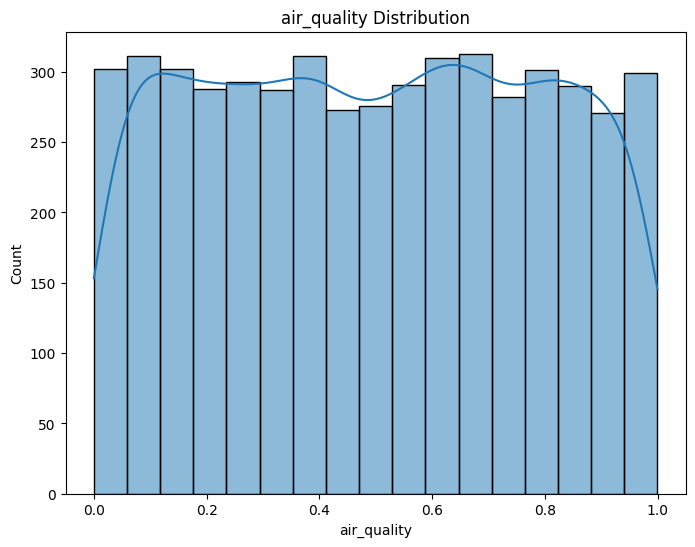

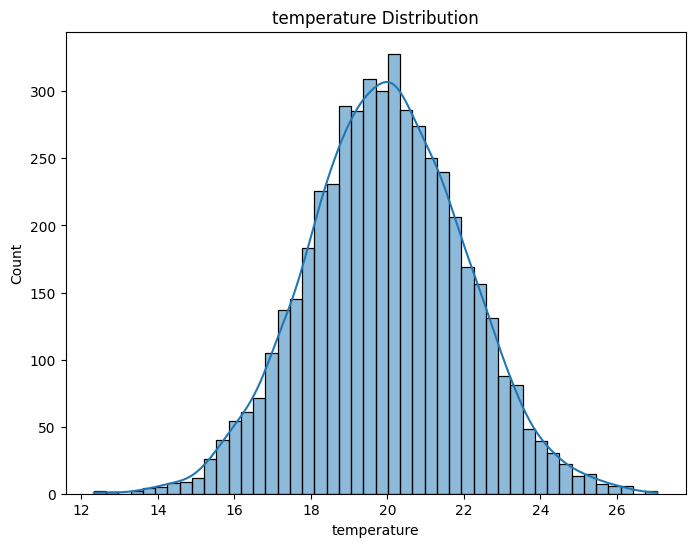

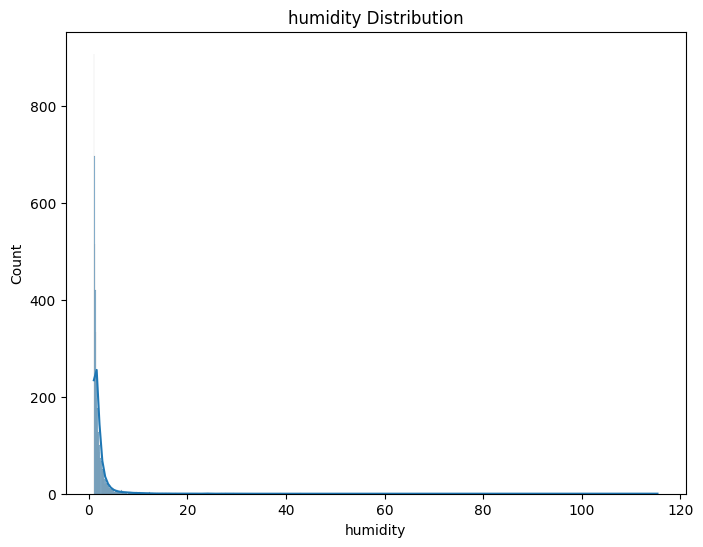

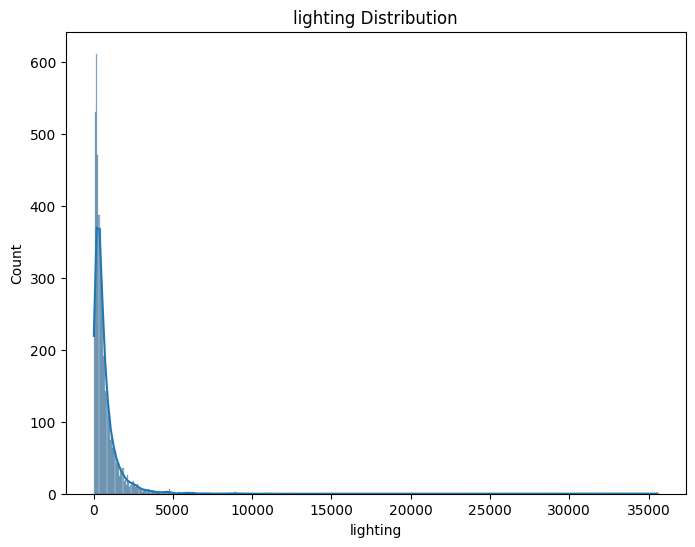

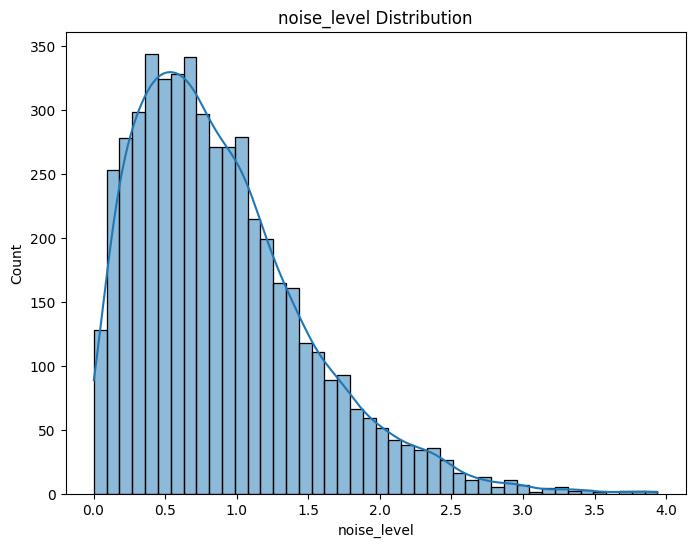

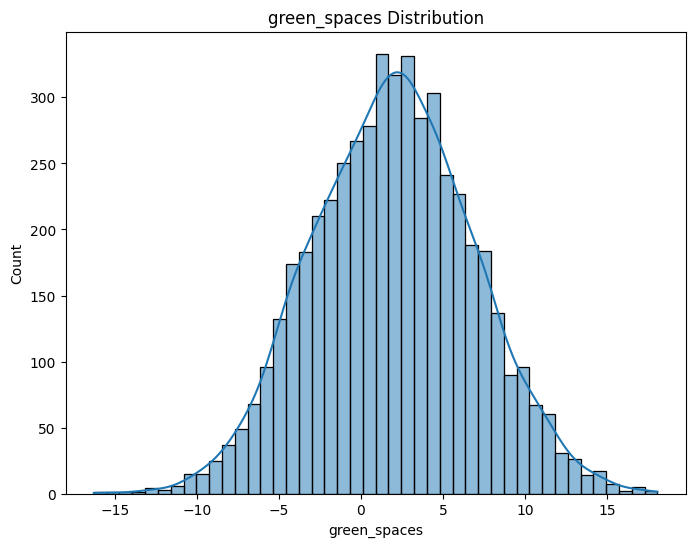

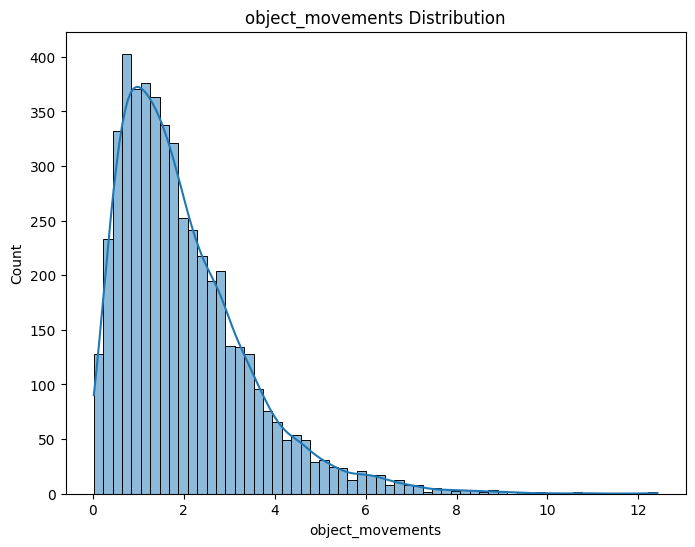

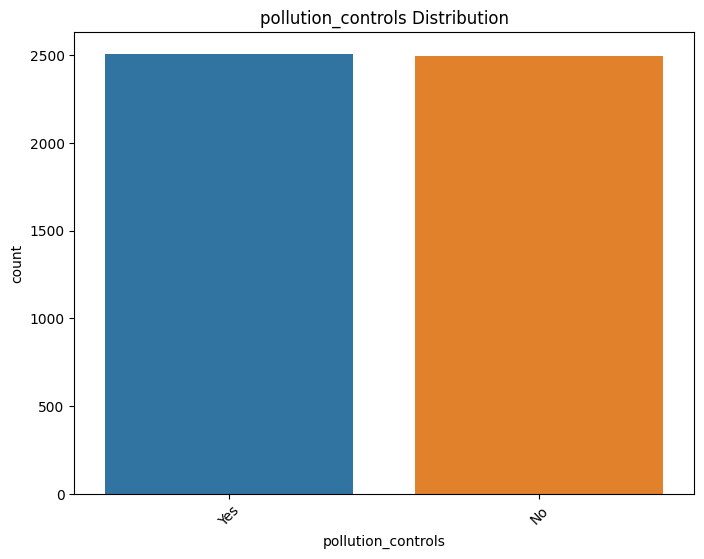

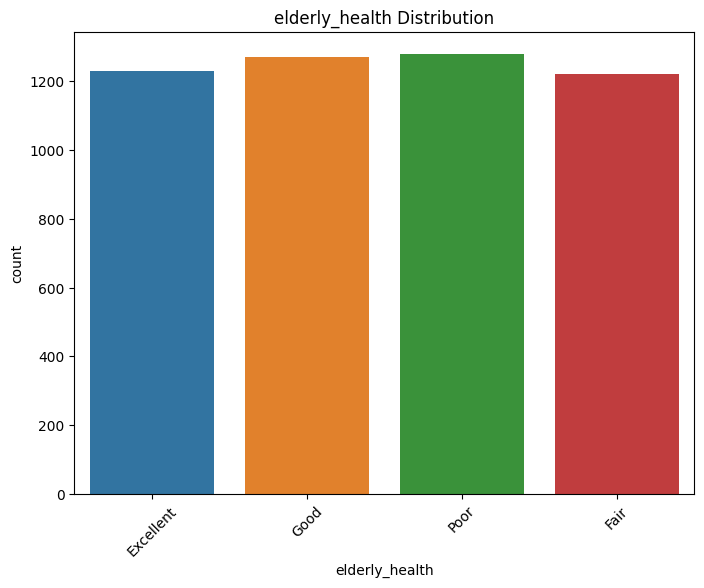

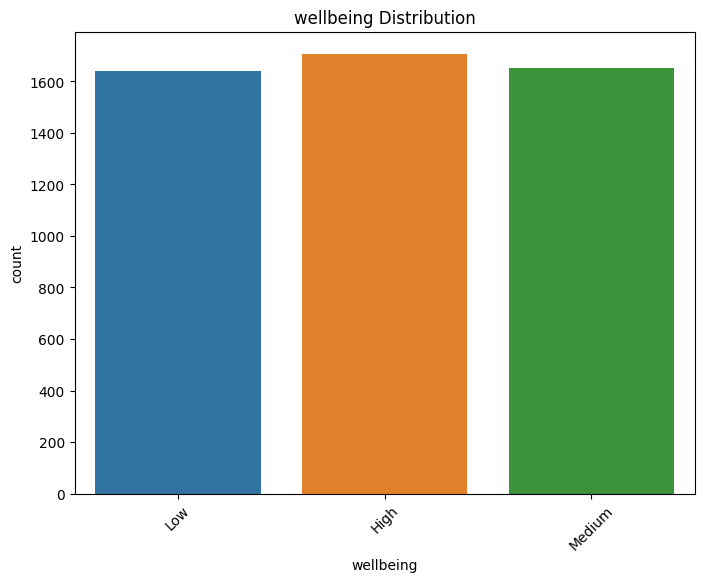

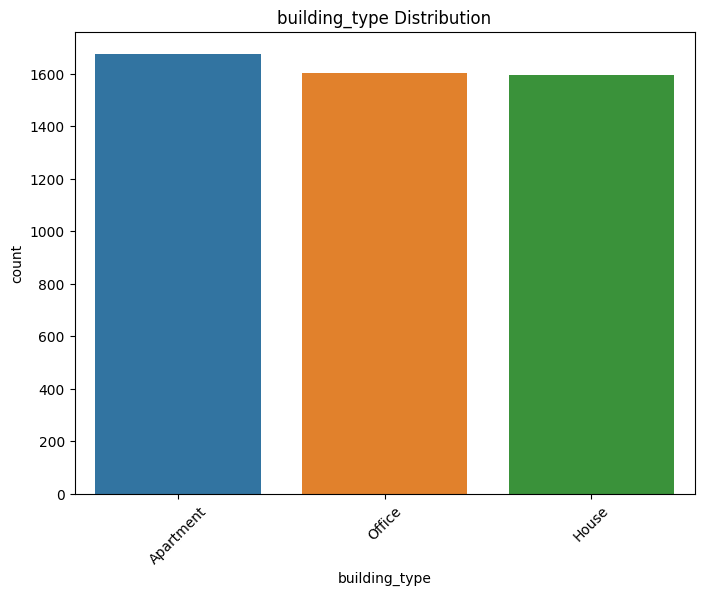

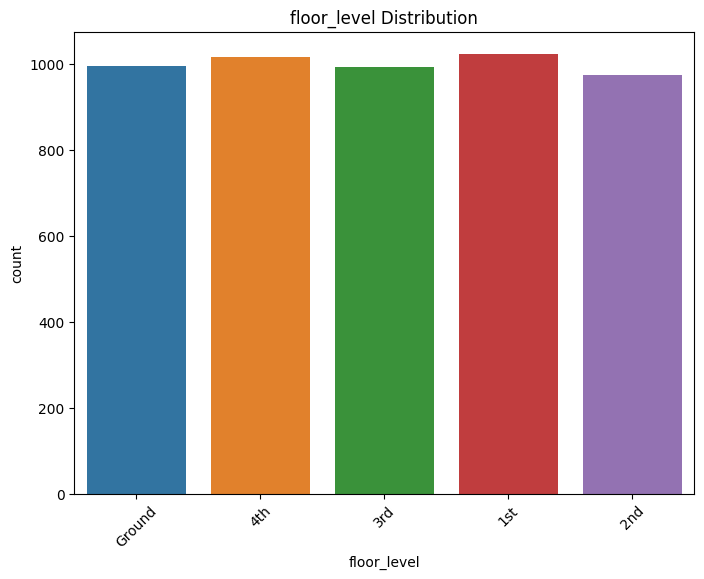

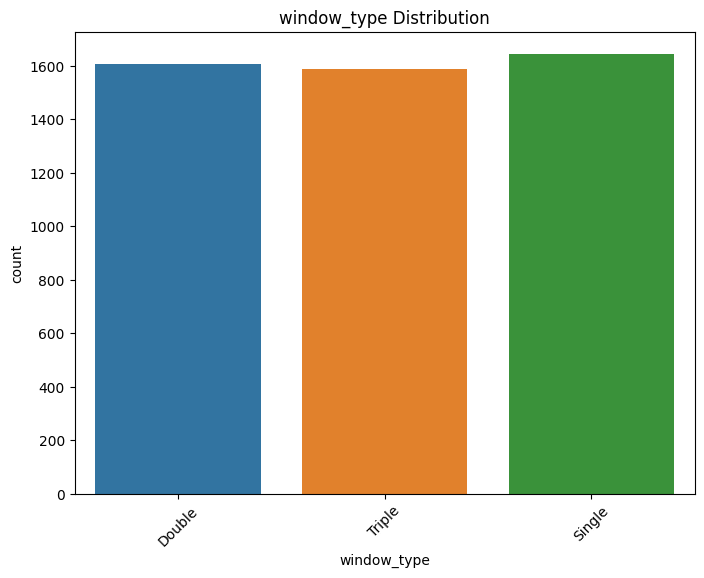

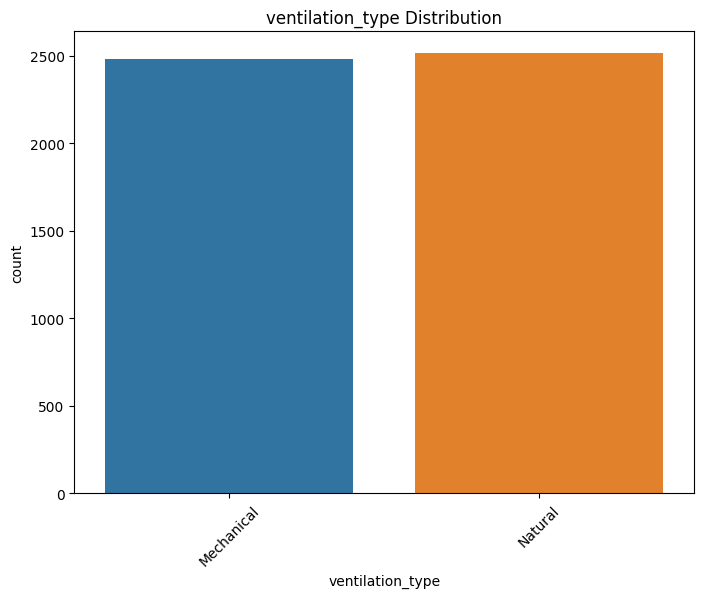

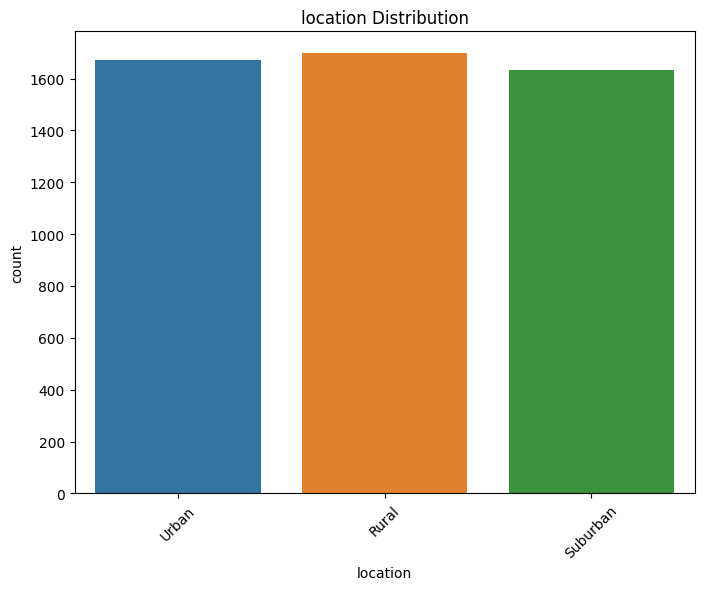

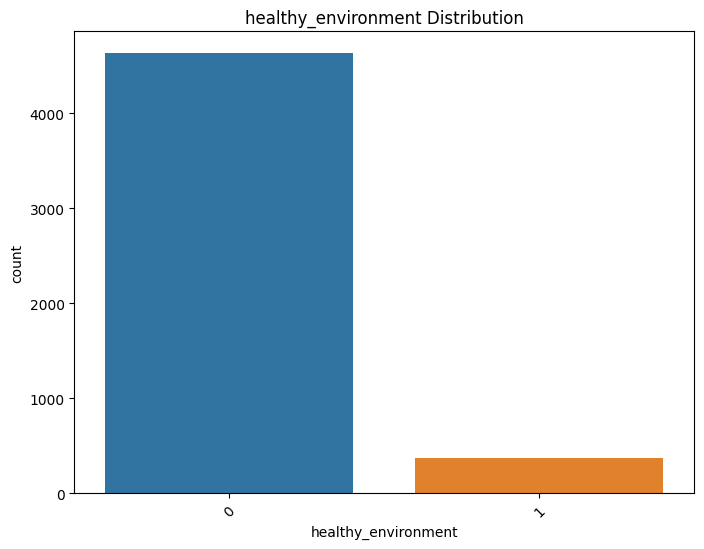

In [8]:
# Univariate Analysis
def univariate_analysis(data):
    # Plot histograms for numerical features
    numerical_features = ['air_quality', 'temperature', 'humidity', 'lighting', 'noise_level', 'green_spaces','object_movements']
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=data, x=feature, kde=True)
        plt.title(f'{feature} Distribution')
        plt.show()

    # Plot bar plots for categorical features
    categorical_features = [ 'pollution_controls', 'elderly_health', 'wellbeing',
                            'building_type', 'floor_level', 'window_type', 'ventilation_type', 'location','healthy_environment']
    for feature in categorical_features:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=feature)
        plt.title(f'{feature} Distribution')
        plt.xticks(rotation=45)
        plt.show()


# Perform univariate analysis
univariate_analysis(data)

Observations from univariate analysis:
- We can observe the distributions of numerical features from the hist-plots.
  - The temperature and green_spaces features seem to have normal distribution so no further transformation is required
  - humidity seems to have pareto distribution so further transformation is required
  - lighting seems to be log_normal so further transformation is required
  - noise_level seems to be weibul distribution and object_movements seem to have gamma distribution so further transformation is required

- We can observe the distribution of categorical features from the bar-plots.
  - pollution_controls has two classes - Yes and no
  - elderly_health has 4 classes - excellent, good, fair,poor
  - well_being has 3 classes - high, medium and low
  - building_type has three classes - house, apartment, office
  - floor_level has 5 classes - ground,1st, 2nd, 3rd, 4th
  - window_type has 3 classes - single, double, triple
  - ventilation_type has 2 classes - natural, mechanical
  - location has 3 classes - urban, suburban, rural
  - healthy_environment(target) has 2 classes - 0 and 1
  - All the categorical features seem to have balanced class distribution
- The target feature(healthy_environment) is imbalanced so handling it is required.


Transforming the numerical features in normal or gaussian type:
- Humidity has pareto distribution so we will be using box-cox transform to estimate this distribution into Gaussian/Normal distribution
- Lighting has log-normal distribution so we will use log transformation to get this data into normal distribution
- noise_level has weibull distribution so we will try to use box-cox transform and check if it helps us in estimating the distribution as normal distribution
- object_movements has gamma distribution so we will use johnsonsu to estimate the data into normal distribution

In [9]:
def transform_to_normal(df):
    # Transform humidity using Box-Cox transformation
    df['humidity'], _ = stats.boxcox(df['humidity'] + 1)

    # Transform lighting using log transformation
    df['lighting'] = np.log1p(df['lighting'])

    # Transform noise_level using Box-Cox transformation
    df['noise_level'], _ = stats.boxcox(df['noise_level'] + 1)

    # Transform object_movements using Johnson SU transformation
    transformed_object_movements = stats.johnsonsu.fit(df['object_movements'])
    df['object_movements'] = stats.johnsonsu(*transformed_object_movements).cdf(df['object_movements'])

    return df

# Apply the transformations
data = transform_to_normal(data)

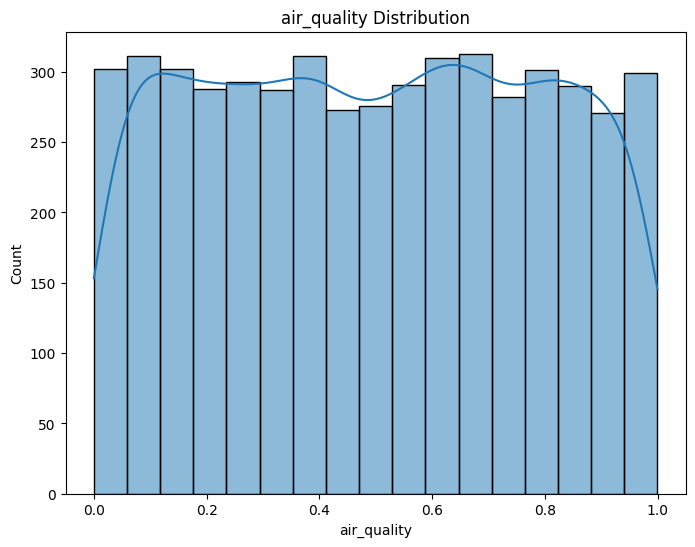

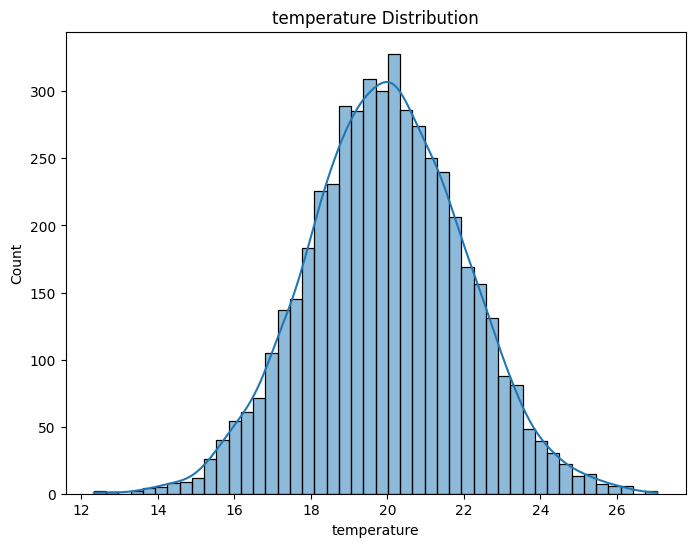

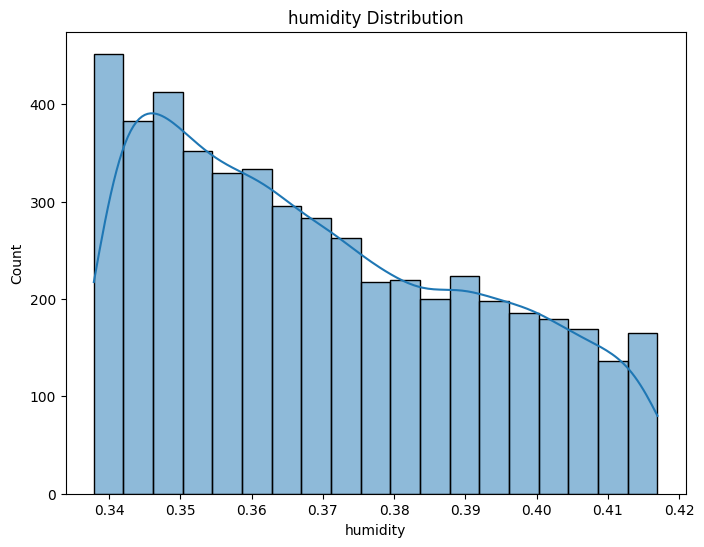

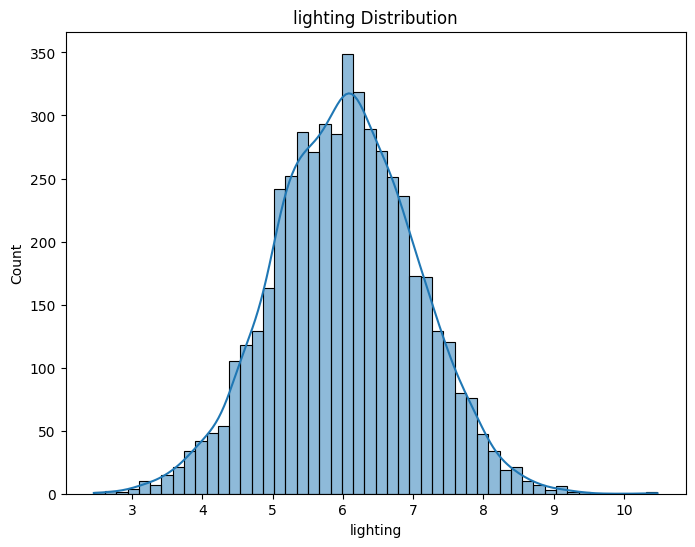

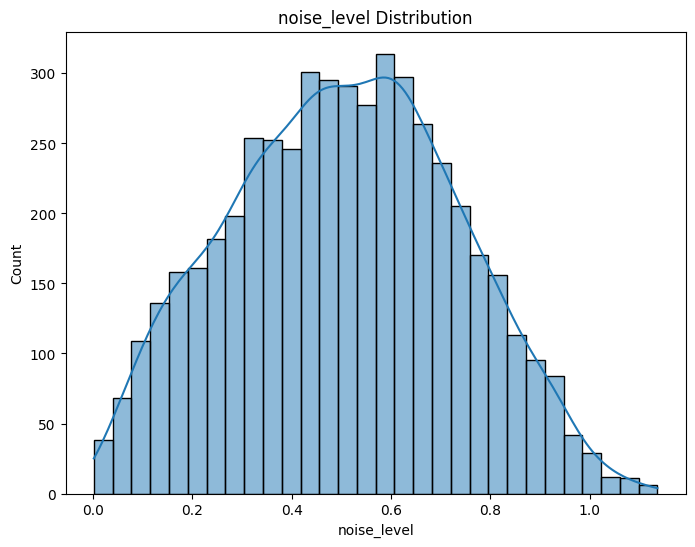

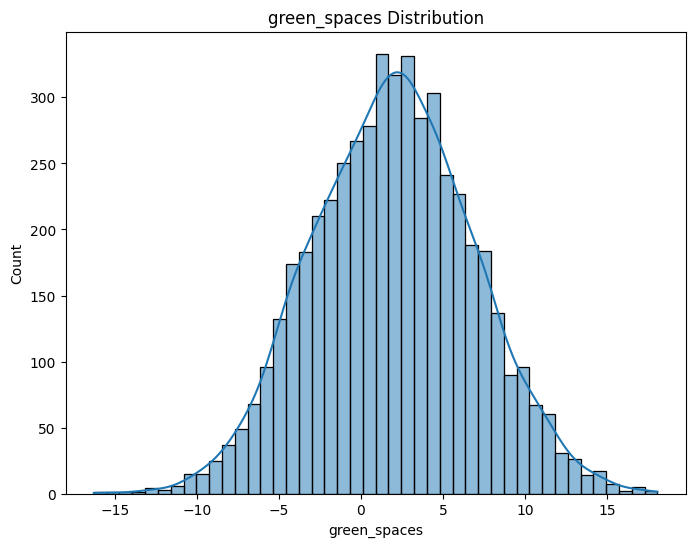

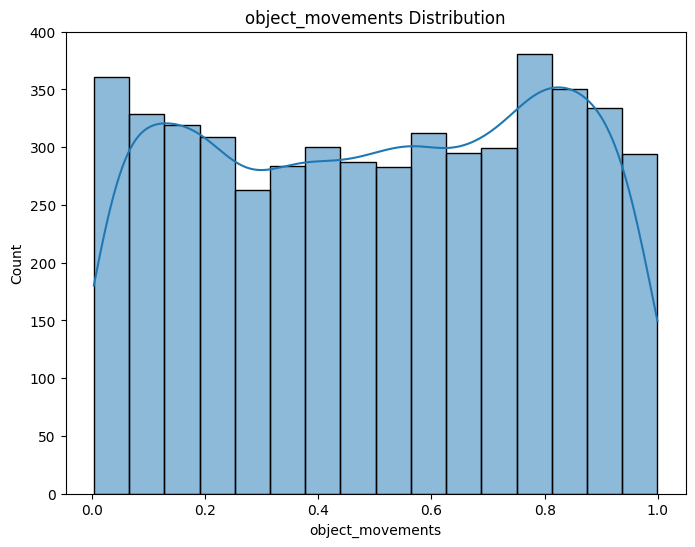

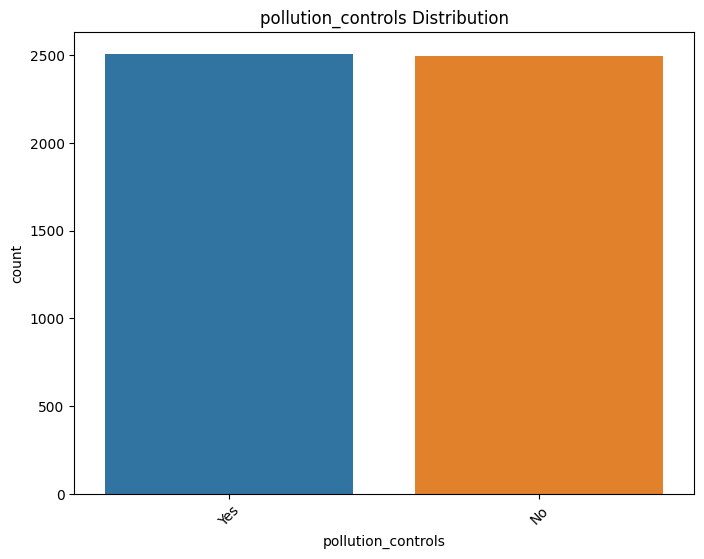

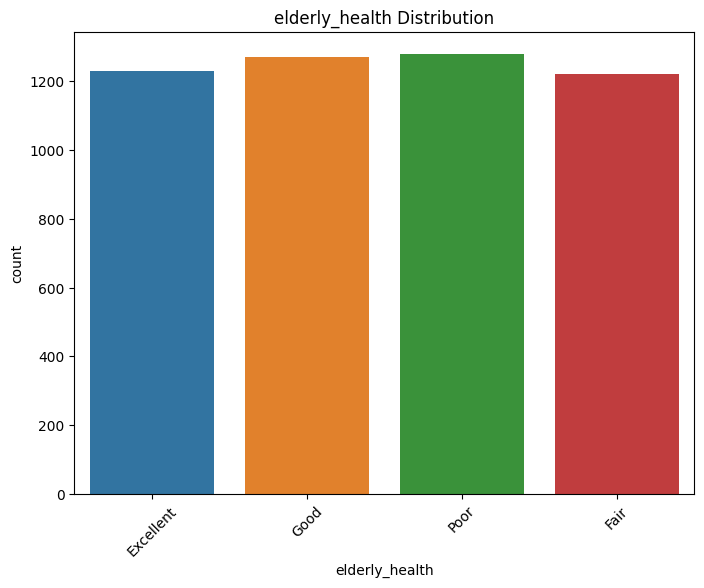

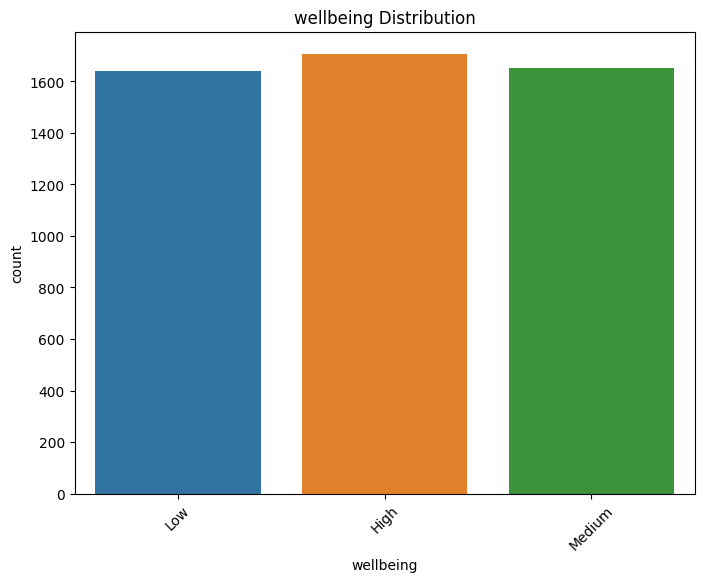

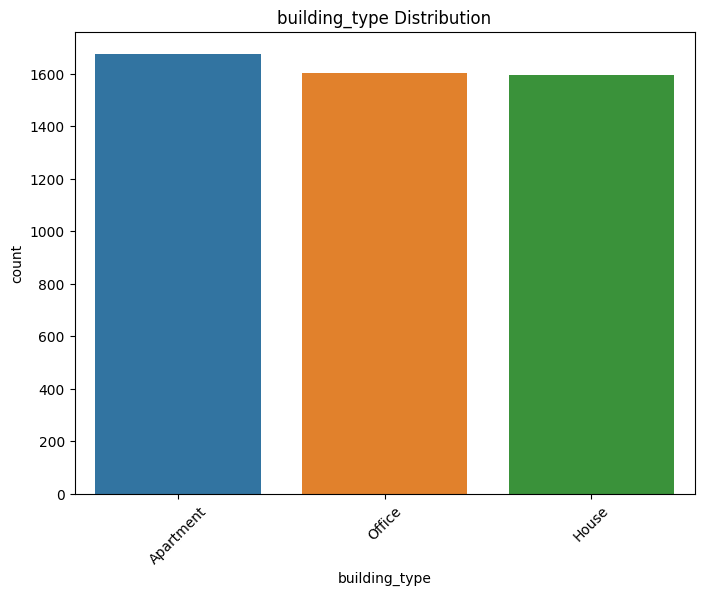

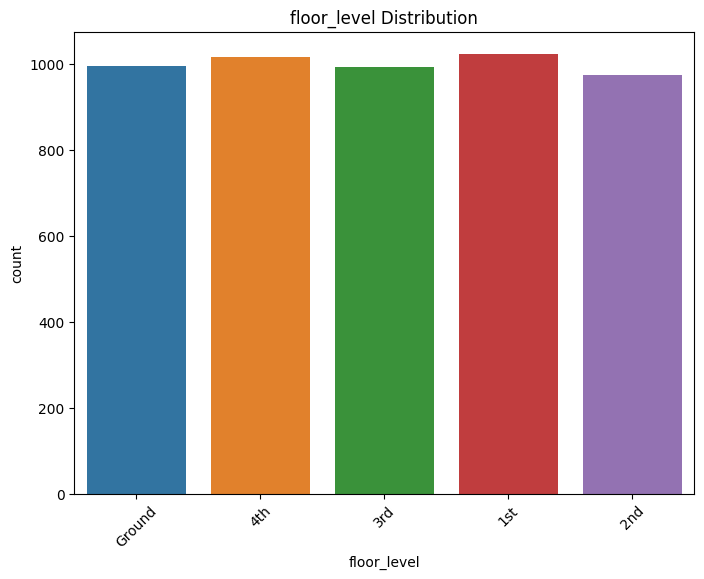

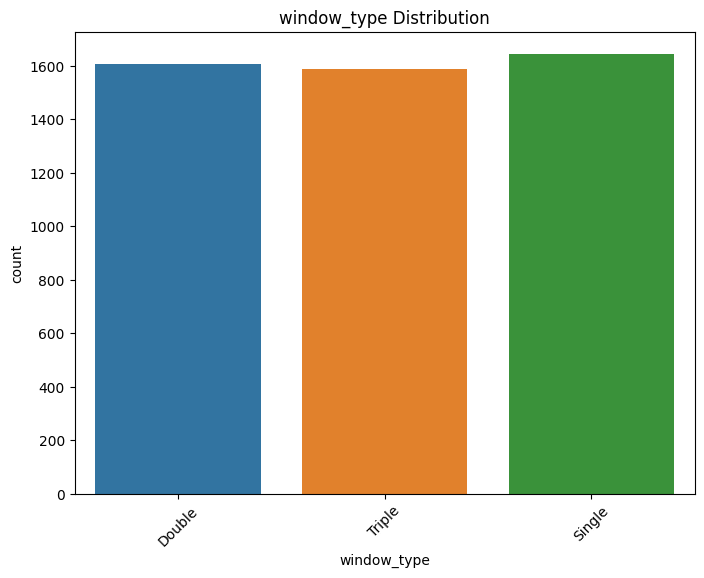

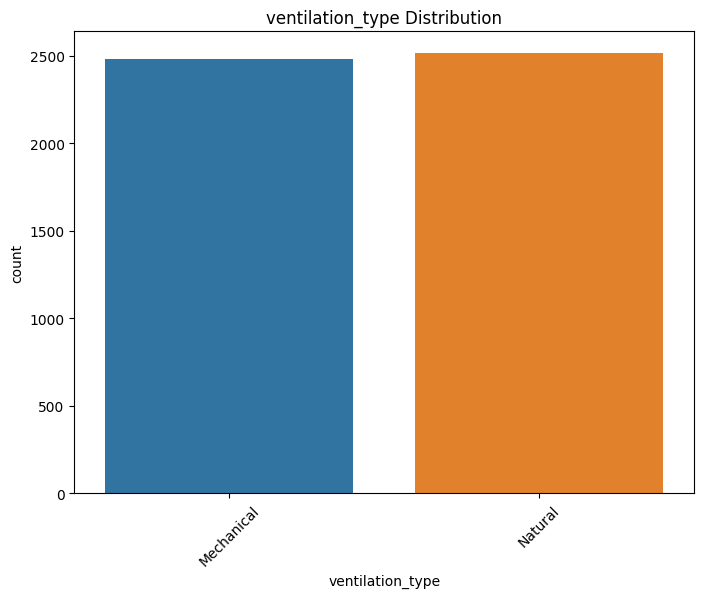

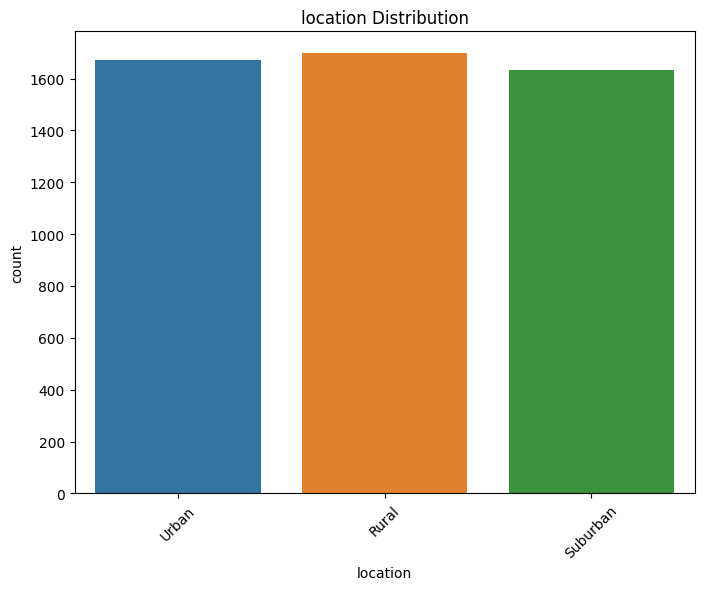

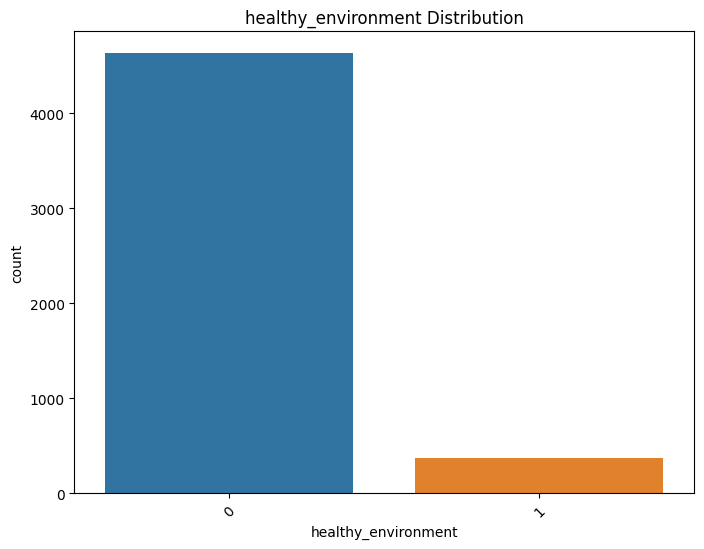

In [10]:
# Perform univariate analysis
univariate_analysis(data)

- Now mostly all the numerical features are estimated towards gaussian so we can also impute our missing values too

In [11]:
# imputing missing values
def impute_null_values(df):
    # Impute temperature using mean
    df['temperature'].fillna(df['temperature'].median(), inplace=True)

    # Impute building_type using mode
    df['building_type'].fillna(df['building_type'].mode()[0], inplace=True)

    # Impute window_type using mode
    df['window_type'].fillna(df['window_type'].mode()[0], inplace=True)

    return df

data = impute_null_values(data)

Observations from imputing the Null values
- As the temperature distribution has been set so any imputation can be used so median us used to impute the null values
- Mode is used to impute the null values in other two features building_type, window_type.

#### Bivariate Analysis

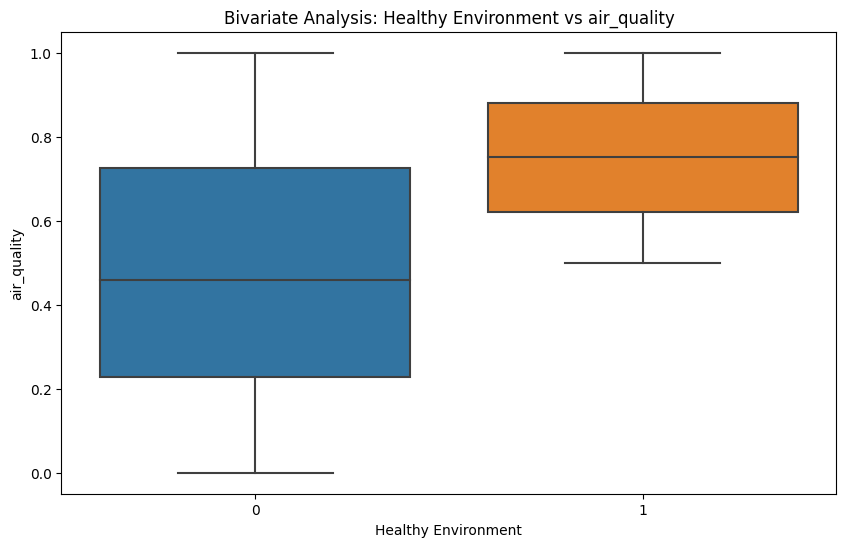

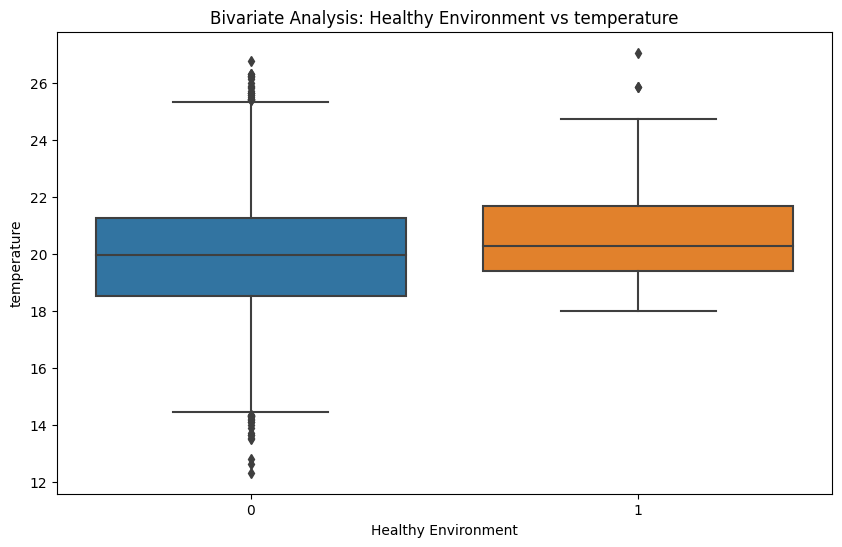

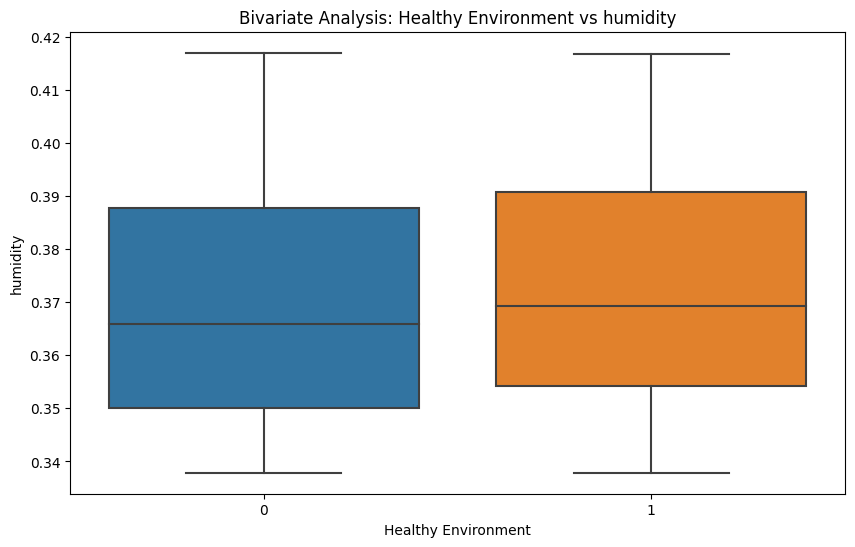

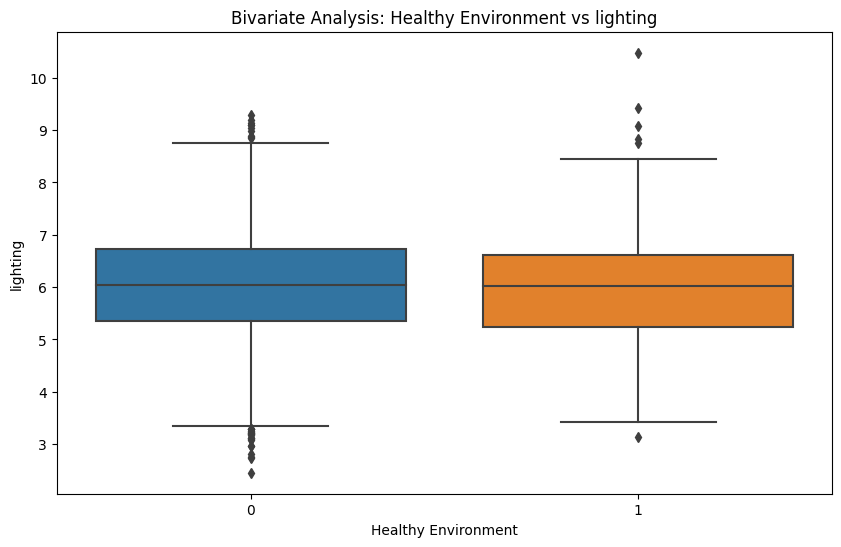

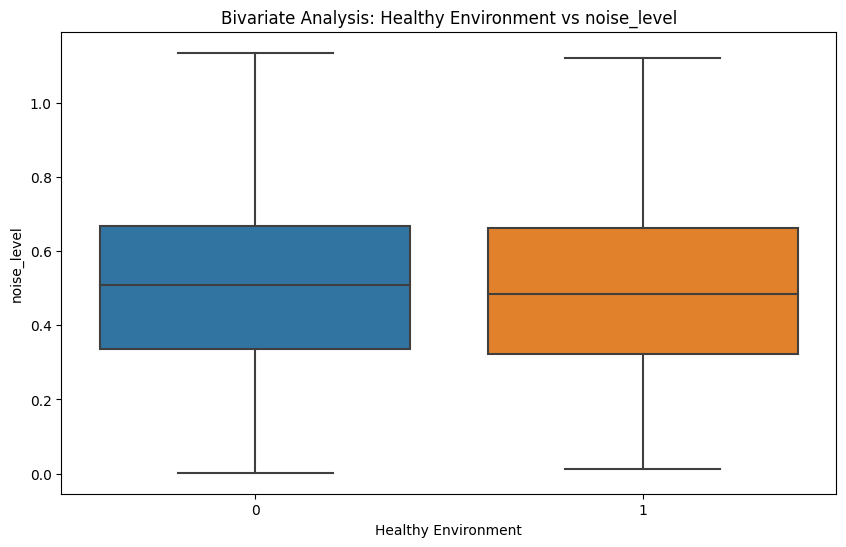

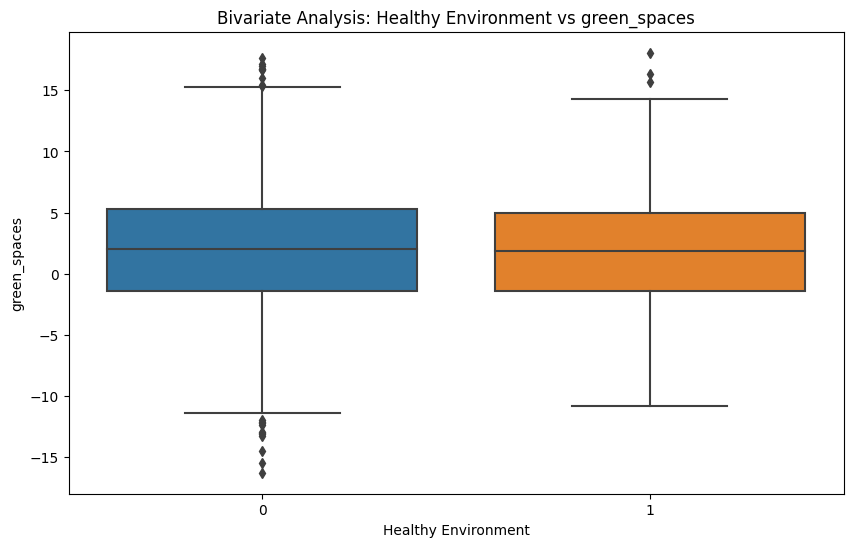

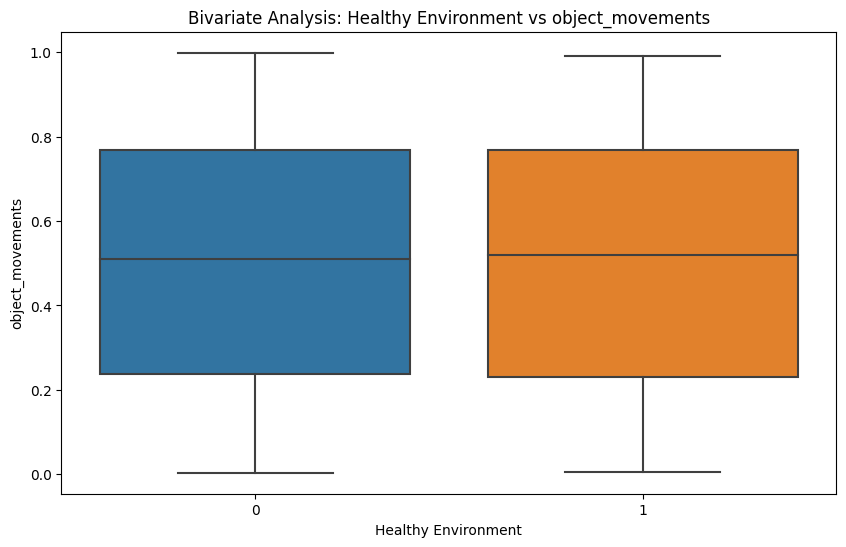

In [12]:
def perform_bivariate_analysis(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='healthy_environment', y=feature, data=df)
        plt.xlabel('Healthy Environment')
        plt.ylabel(feature)
        plt.title(f'Bivariate Analysis: Healthy Environment vs {feature}')
        plt.show()

# List of features for bivariate analysis
bivariate_features = ['air_quality', 'temperature', 'humidity', 'lighting', 'noise_level',
                      'green_spaces', 'object_movements']

# Perform bivariate analysis on the features
perform_bivariate_analysis(data, bivariate_features)



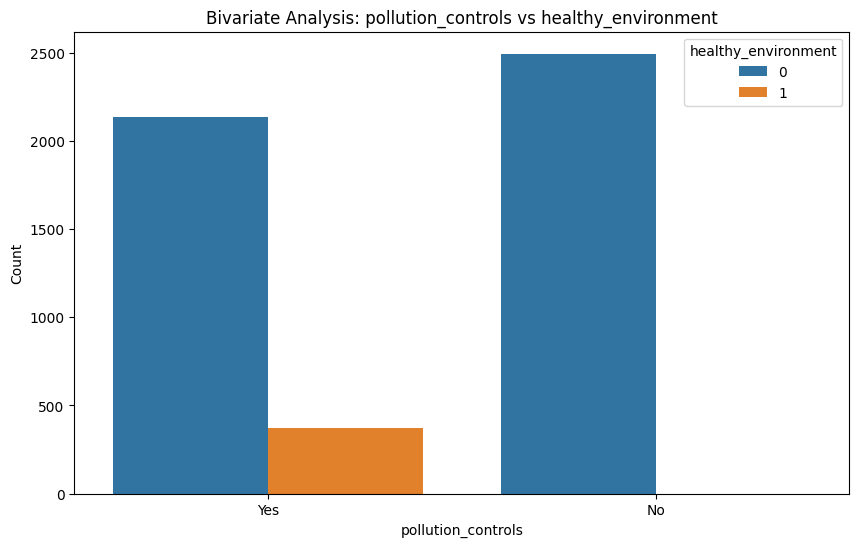

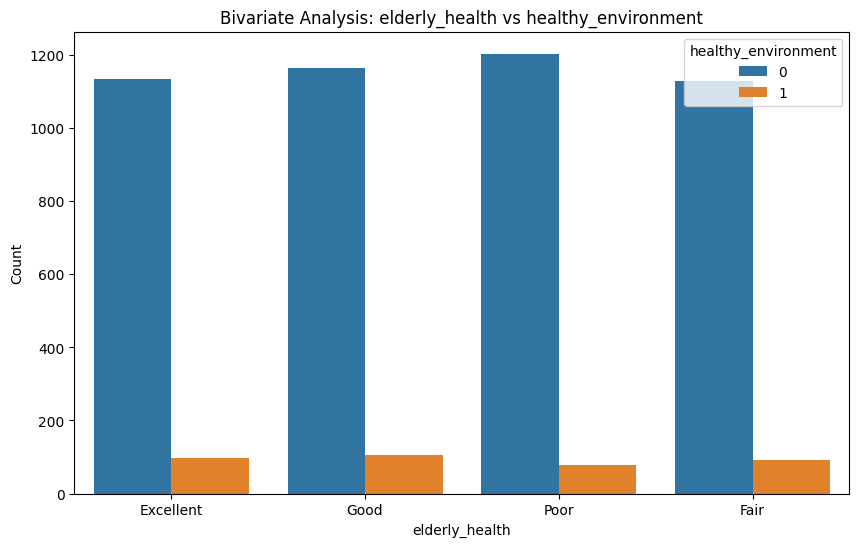

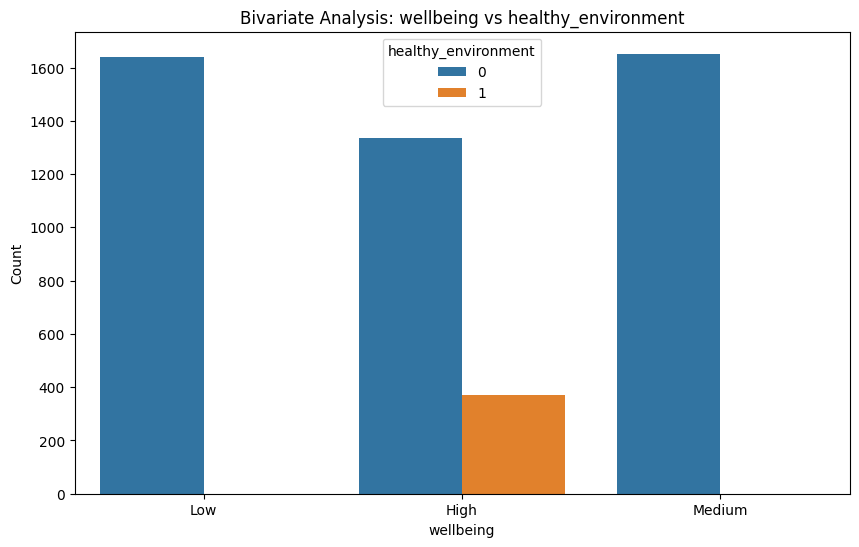

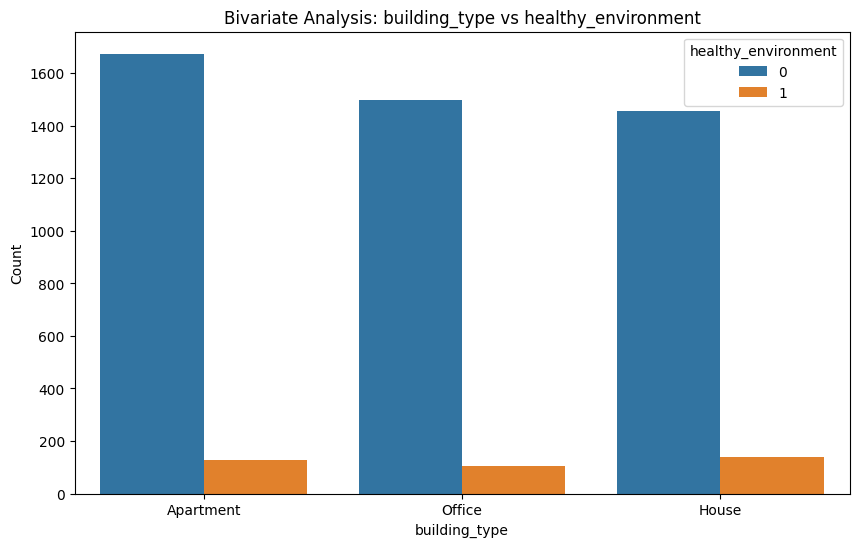

In [13]:
def perform_categorical_bivariate_analysis(df, categorical_features, target_feature):
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue=target_feature, data=df)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Bivariate Analysis: {feature} vs {target_feature}')
        plt.legend(title=target_feature)
        plt.show()

# List of categorical features for bivariate analysis
categorical_features = ['pollution_controls', 'elderly_health', 'wellbeing', 'building_type']

# Perform bivariate analysis between categorical features and target feature
perform_categorical_bivariate_analysis(data, categorical_features, 'healthy_environment')


In [14]:
def perform_categorical_bivariate_analysis_plotly(df, categorical_features, target_feature):
    for feature in categorical_features:
        fig = px.histogram(df, x=feature, color=target_feature, barmode='group')
        fig.update_layout(
            title=f'Bivariate Analysis: {feature} vs {target_feature}',
            xaxis_title=feature,
            yaxis_title='Count'
        )
        fig.show()

# List of categorical features for bivariate analysis
categorical_features = ['floor_level', 'window_type', 'ventilation_type', 'location']

# Perform bivariate analysis between categorical features and target feature
perform_categorical_bivariate_analysis_plotly(data, categorical_features, 'healthy_environment')


Observations from Bivariate analysis
- We can observe that the air quality has a mean value around 0.4  for unhealthy environment and 0.8 for a healthy environment.
- We can obseve average temperature for healthyh environment is around 22 and average temperature for unhealthy environment is around 16
- The average noise level is usually low for healthy environment where as it is very high for unhealthy environment
- Object_movements seem to have very less effect on unhealthy or healthy environment as they both seem to be similar while observed from box-plot
- As the data is imbalanced, The features like pollution control, elderly health, well-being, building_type are mostly available for unhealthly environment and less available for healthy environment

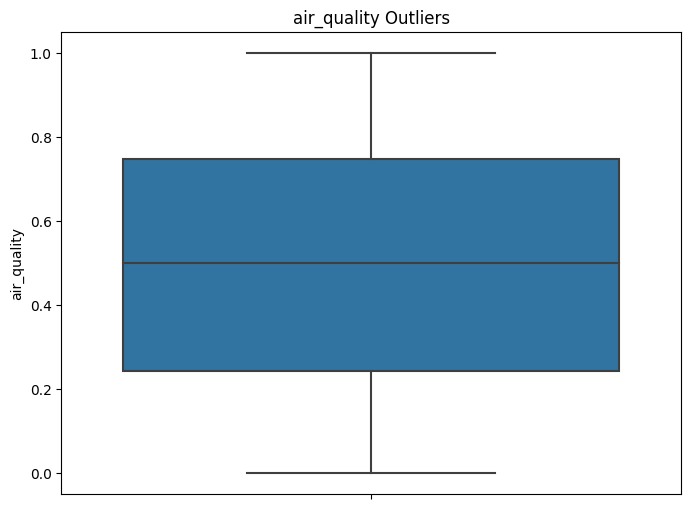

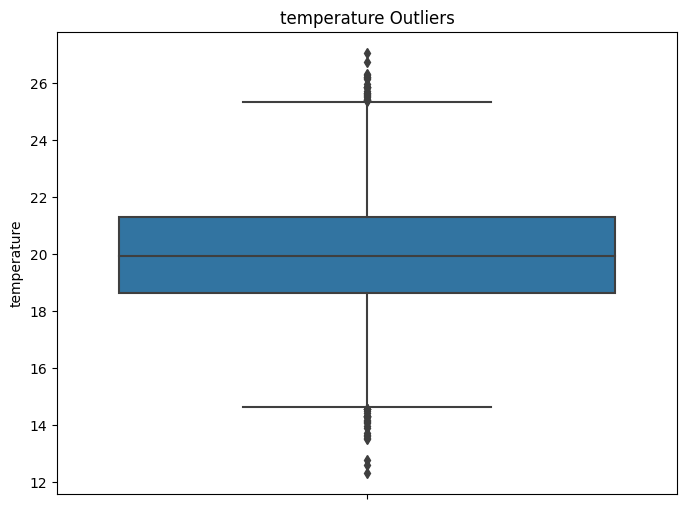

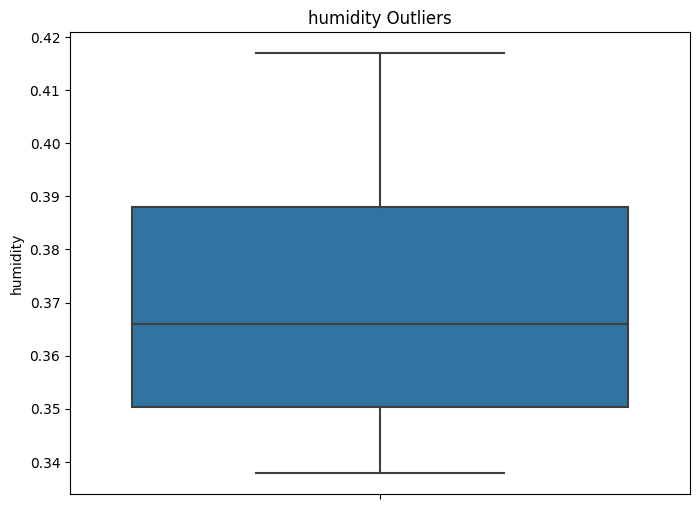

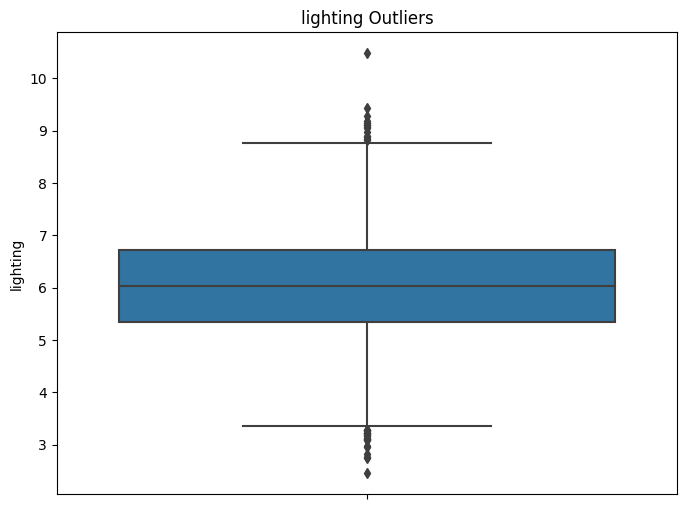

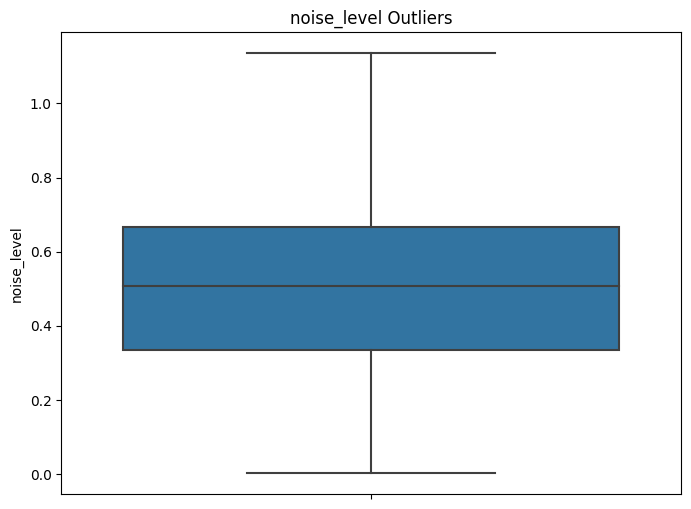

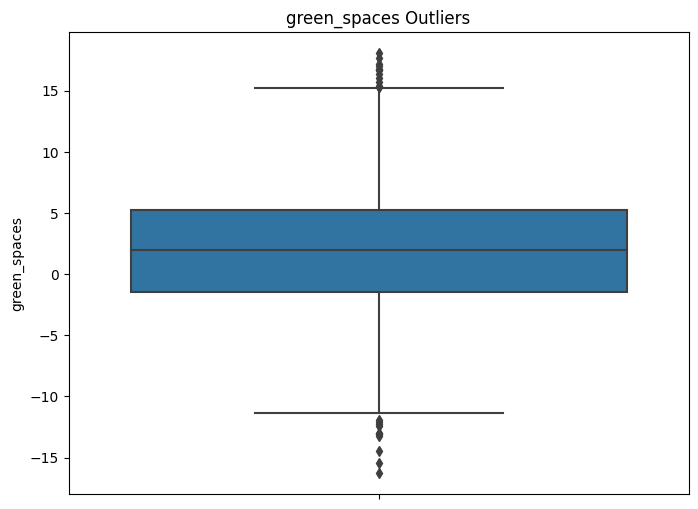

In [15]:
# Outlier Analysis
def outlier_analysis(data):
    # Plot box plots for numerical features to identify outliers
    numerical_features = ['air_quality', 'temperature', 'humidity', 'lighting', 'noise_level', 'green_spaces']
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, y=feature)
        plt.title(f'{feature} Outliers')
        plt.show()


# Perform outlier analysis
outlier_analysis(data)

- We can observe that there are mostly no outliers in the most of the features, only the green_spaces feature seem to have few outliers.

In [16]:
data.corr()

,air_quality,temperature,humidity,lighting,noise_level,green_spaces,object_movements,healthy_environment
air_quality,1.000000,-0.028375,-0.003850,-0.000037,-0.005153,-0.002208,-0.007929,0.247713
temperature,-0.028375,1.000000,0.020495,-0.000406,0.008881,-0.004440,0.004574,0.091462
humidity,-0.003850,0.020495,1.000000,0.005035,-0.022578,0.018184,-0.005817,0.032901
lighting,-0.000037,-0.000406,0.005035,1.000000,-0.018702,-0.002811,0.021989,-0.010102
noise_level,-0.005153,0.008881,-0.022578,-0.018702,1.000000,0.015722,-0.005823,-0.013013
green_spaces,-0.002208,-0.004440,0.018184,-0.002811,0.015722,1.000000,-0.011104,-0.007419
object_movements,-0.007929,0.004574,-0.005817,0.021989,-0.005823,-0.011104,1.000000,-0.002561
healthy_environment,0.247713,0.091462,0.032901,-0.010102,-0.013013,-0.007419,-0.002561,1.000000


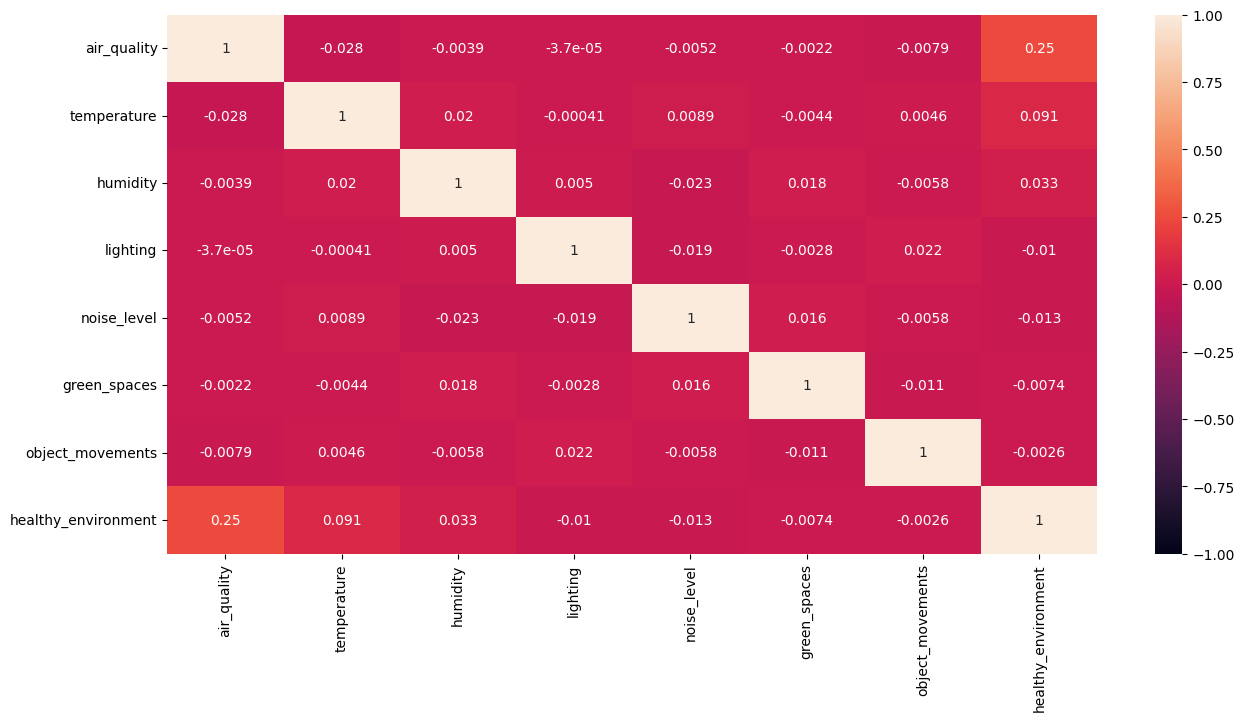

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Observations from the correlation plot
- Air Quality: There is a weak negative correlation between air quality and temperature (-0.028), indicating that higher temperatures may slightly contribute to lower air quality.

- Temperature: The correlation between temperature and other variables is relatively low. However, there is a small positive correlation between temperature and healthy_environment (0.091), suggesting that higher temperatures might be associated with a healthier environment.

- Humidity: Humidity has a very weak positive correlation with healthy_environment (0.032), implying that higher humidity levels may slightly contribute to a healthier environment.

- Lighting: There are no significant correlations between lighting and other variables, as all correlation values are close to zero.

- Noise Level: The correlation between noise_level and other variables is also relatively weak. However, there is a slight negative correlation between noise_level and healthy_environment (-0.013), suggesting that higher noise levels may have a small negative impact on a healthy environment.

- Green Spaces: Similarly, the correlation between green_spaces and other variables is generally weak. There is a slight negative correlation between green_spaces and noise_level (-0.011), indicating that more green spaces might contribute to reducing noise levels.

- Object Movements: Object_movements have weak correlations with other variables, except for a small positive correlation with lighting (0.022). This suggests that object movements might be slightly associated with higher lighting levels.

- Healthy Environment: The variable healthy_environment shows the highest correlation with air_quality (0.248), indicating that air quality has a relatively stronger impact on the perception of a healthy environment. Other variables show weak correlations with healthy_environment.

In [18]:
sns.pairplot(data, hue="healthy_environment")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

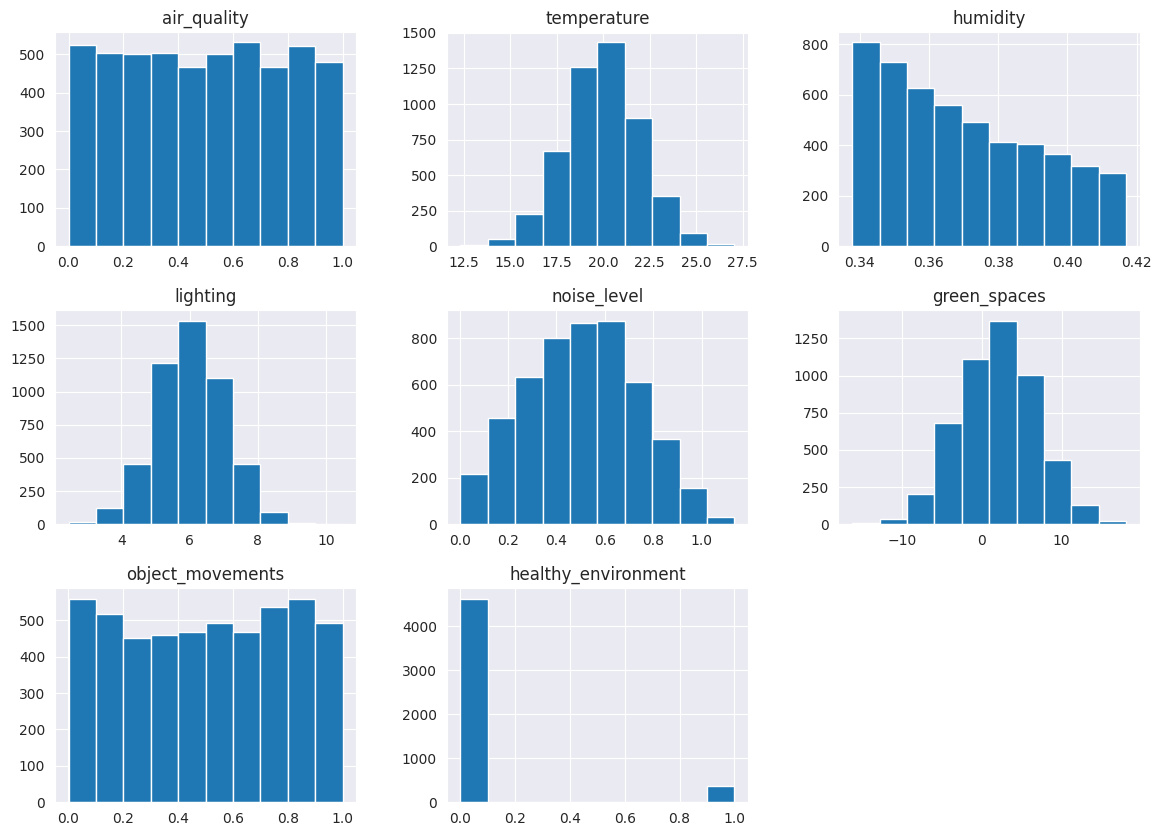

In [19]:
sns.set_style("darkgrid")
data.hist(figsize=(14, 10))
plt.show()

### Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the pollution_controls column
label_encoder = LabelEncoder()
data['pollution_controls'] = label_encoder.fit_transform(data['pollution_controls'])

# Perform label encoding on the elderly_health column
data['elderly_health'] = label_encoder.fit_transform(data['elderly_health'])

# Perform label encoding on the wellbeing column
data['wellbeing'] = label_encoder.fit_transform(data['wellbeing'])

# Perform label encoding on the building_type column
data['building_type'] = label_encoder.fit_transform(data['building_type'])

# Perform label encoding on the floor_level column
data['floor_level'] = label_encoder.fit_transform(data['floor_level'])

# Perform label encoding on the window_type column
data['window_type'] = label_encoder.fit_transform(data['window_type'])

# Perform label encoding on the ventilation_type column
data['ventilation_type'] = label_encoder.fit_transform(data['ventilation_type'])

# Perform label encoding on the location column
data['location'] = label_encoder.fit_transform(data['location'])


# drop the original categorical columns from the dataframe
# data.drop(['pollution_controls', 'elderly_health','wellbeing','building_type', 'floor_level','window_type','ventilation_type','location'], axis=1, inplace=True)

- Encoding all the categorical features to one hot encoded vectors as number of classes in each of these features were low

In [21]:
data.head()

,air_quality,temperature,humidity,lighting,noise_level,green_spaces,object_movements,pollution_controls,elderly_health,wellbeing,building_type,floor_level,window_type,ventilation_type,location,healthy_environment
0,0.374540,18.806051,0.349789,5.812469,0.487386,-1.119571,0.147349,1,0,1,0,4,0,0,2,0
1,0.950714,15.219391,0.340115,6.293225,0.251626,-2.110013,0.064271,1,0,1,2,3,2,0,0,0
2,0.731994,19.175559,0.409216,6.328861,0.484425,0.060531,0.759857,1,0,1,0,3,0,0,0,0
3,0.598658,21.826947,0.354513,6.156770,0.309923,3.846974,0.520898,0,0,0,0,2,1,0,2,0
4,0.156019,21.075260,0.362649,6.496033,0.668020,5.409906,0.114413,1,0,2,1,3,0,1,2,0


In [22]:
# split the data into training and testing sets
X = data.drop('healthy_environment', axis=1)
y = data['healthy_environment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify = y)


In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 15), (1500, 15), (3500,), (1500,))

### Modeling

<b> Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
# build a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression Train Score:', lr.score(X_train, y_train))
print('Logistic Regression Test Score:', lr.score(X_test, y_test))


Logistic Regression Train Score: 0.9762857142857143
Logistic Regression Test Score: 0.986


In [25]:
# make predictions on the test data
y_pred = lr.predict(X_test)

# evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1388
           1       0.90      0.92      0.91       112

    accuracy                           0.99      1500
   macro avg       0.94      0.96      0.95      1500
weighted avg       0.99      0.99      0.99      1500



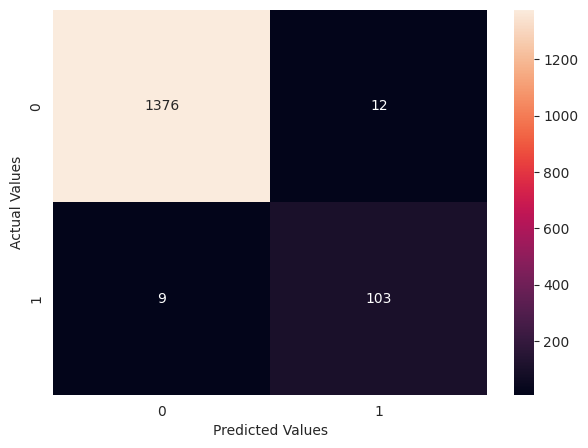

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [27]:
print("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.986


In [28]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n{}\n".format(vif_series))

VIF values: 
air_quality             3.872325
temperature            78.084134
humidity              100.905373
lighting               33.612957
noise_level             5.729011
green_spaces            1.157682
object_movements        3.947814
pollution_controls      2.020744
elderly_health          2.841249
wellbeing               2.436045
building_type           2.363134
floor_level             3.025070
window_type             2.502595
ventilation_type        2.004715
location                2.465744
dtype: float64



<b> Decision Tree

In [29]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)
print('Decision Tree Score:', model0.score(X_test, y_test))


Decision Tree Score: 1.0


In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [31]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 15)
Shape of test set :  (1500, 15)
Percentage of classes in training set:
0    0.925714
1    0.074286
Name: healthy_environment, dtype: float64
Percentage of classes in test set:
0    0.925333
1    0.074667
Name: healthy_environment, dtype: float64


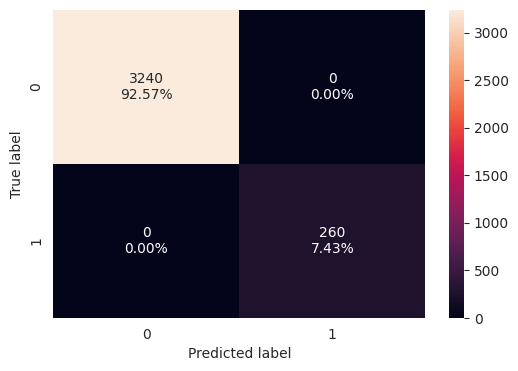

In [32]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [33]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


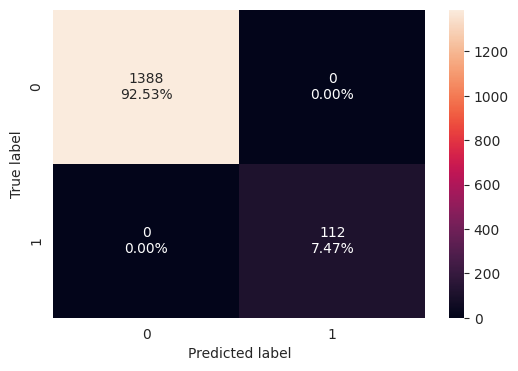

In [34]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [35]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [36]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

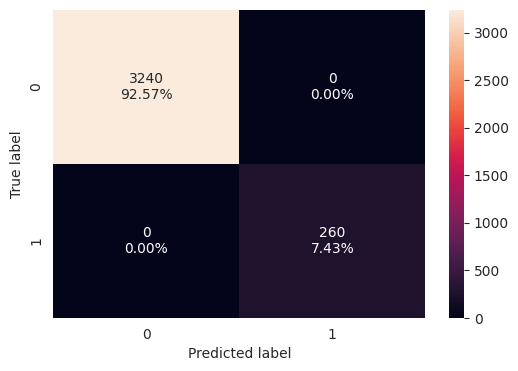

In [37]:
confusion_matrix_sklearn(model, X_train, y_train)

In [38]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


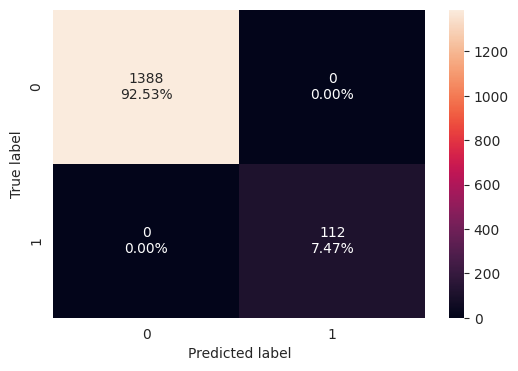

In [39]:
confusion_matrix_sklearn(model, X_test, y_test)

In [40]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<b> Prepruned Decision Tree

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [41]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

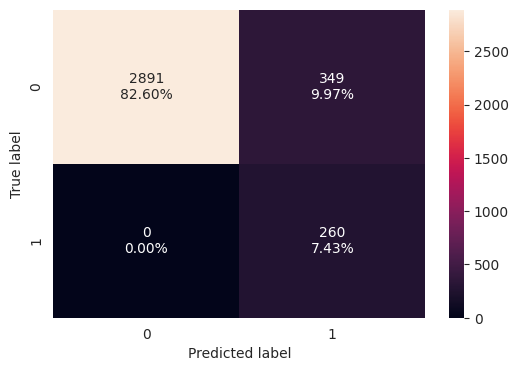

In [42]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [43]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.900286,0.900286,0.957429,0.917471


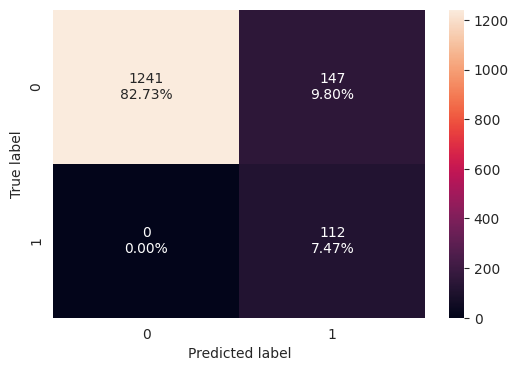

In [44]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [45]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.902,0.902,0.957622,0.918675


In [46]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

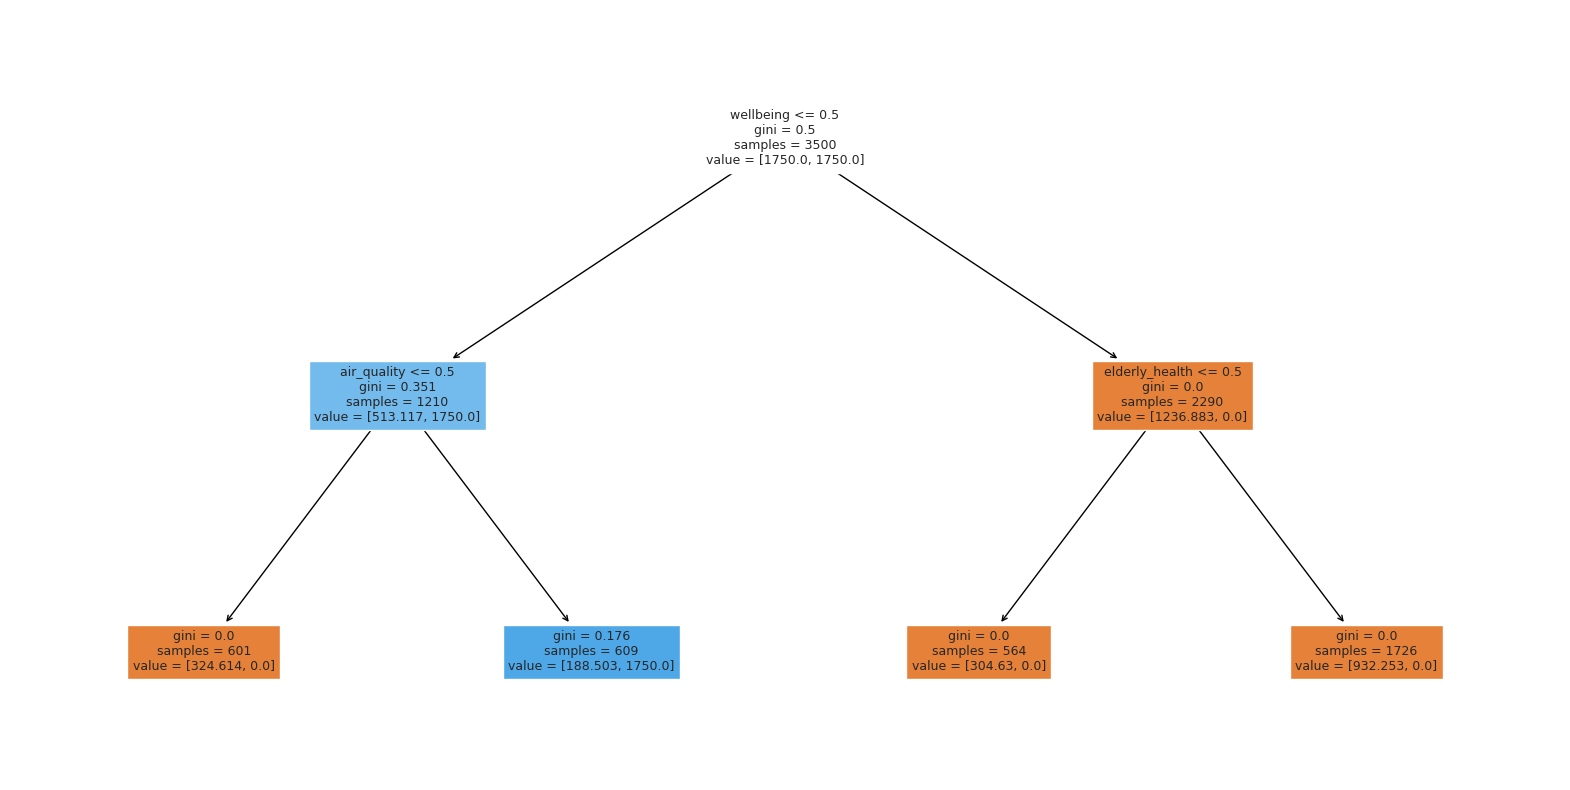

In [47]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [48]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- wellbeing <= 0.50
|   |--- air_quality <= 0.50
|   |   |--- weights: [324.61, 0.00] class: 0
|   |--- air_quality >  0.50
|   |   |--- weights: [188.50, 1750.00] class: 1
|--- wellbeing >  0.50
|   |--- elderly_health <= 0.50
|   |   |--- weights: [304.63, 0.00] class: 0
|   |--- elderly_health >  0.50
|   |   |--- weights: [932.25, 0.00] class: 0



In [49]:
importances = estimator.feature_importances_
importances

array([3.21504727e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.87809324e-13, 6.78495273e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

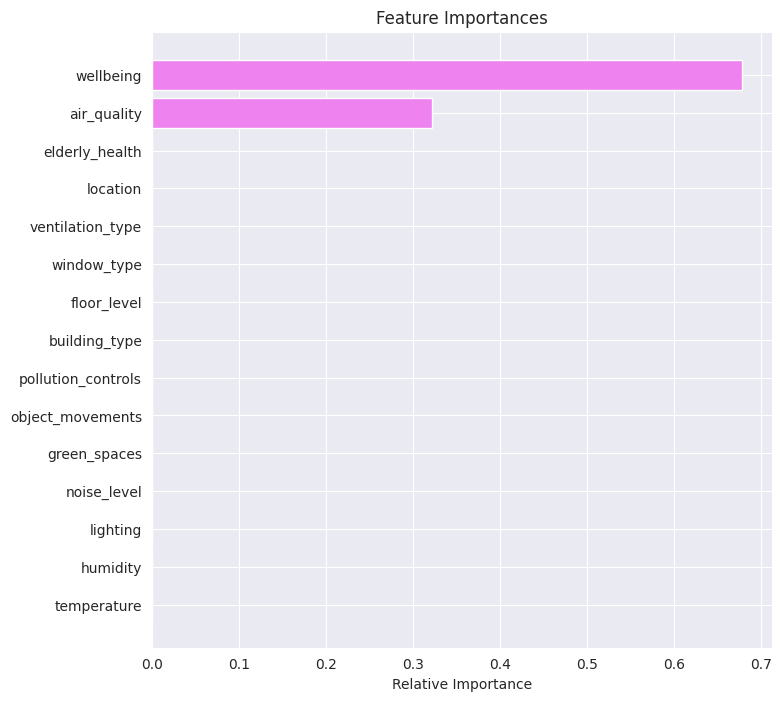

In [50]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<b> Post pruned Decision Tree

In [51]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [52]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.110223e-15
1,1.561935e-13,1.550833e-13
2,1.519757e-02,1.519757e-02
3,8.204400e-02,9.724157e-02
4,1.294887e-01,2.267303e-01
5,2.732697e-01,5.000000e-01


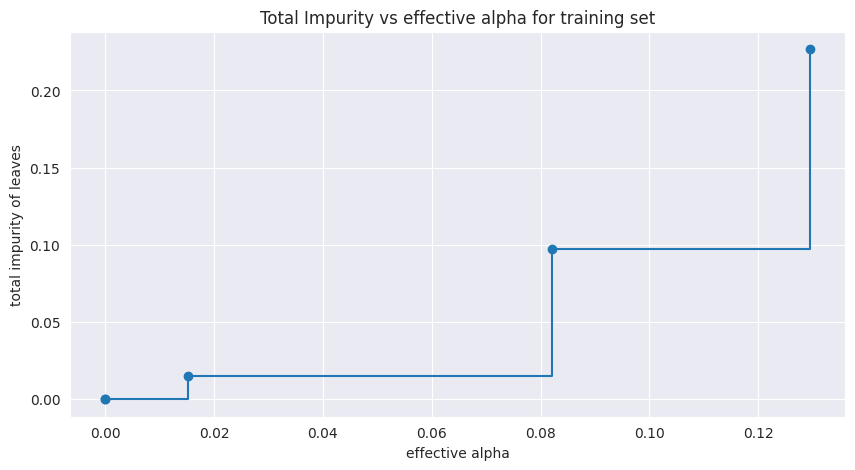

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [54]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.27326968973740473


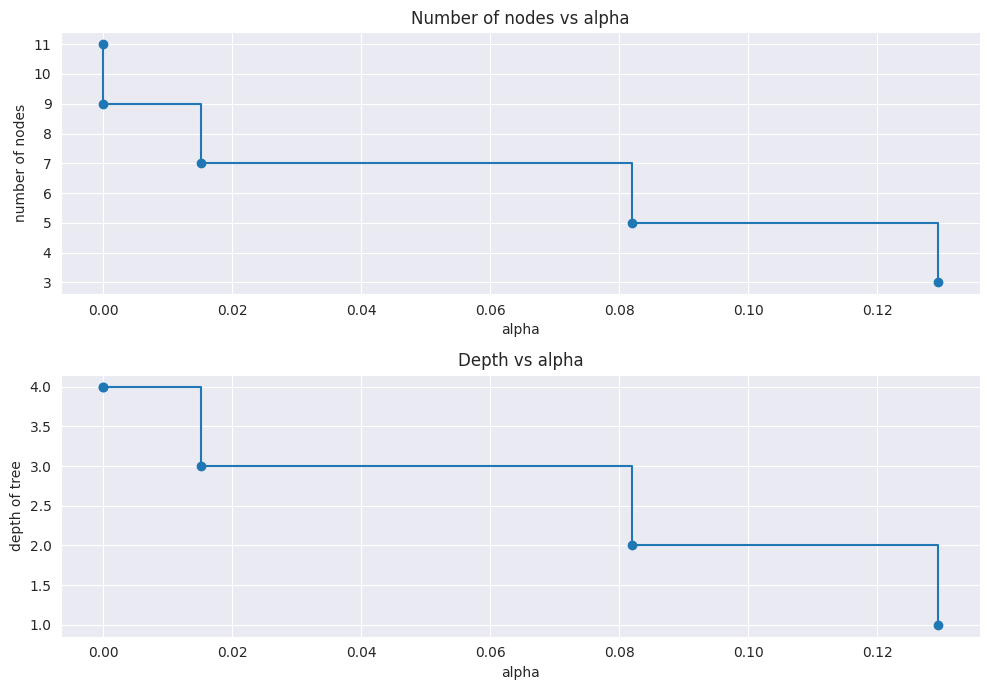

In [55]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [56]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train, average = 'weighted')
    recall_train.append(values_train)

In [57]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test,  average = 'weighted')
    recall_test.append(values_test)

In [58]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

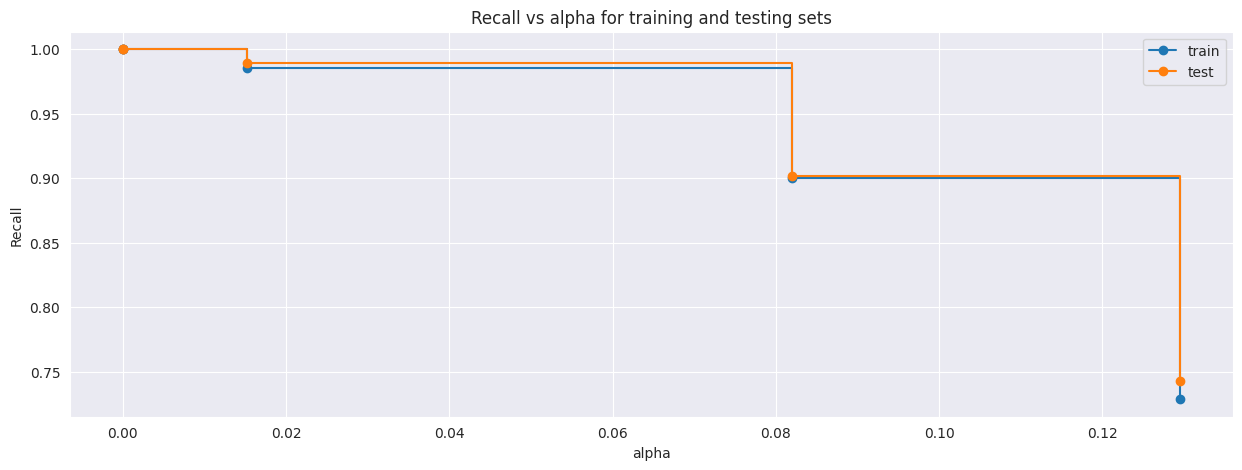

In [59]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [60]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight='balanced', random_state=1)


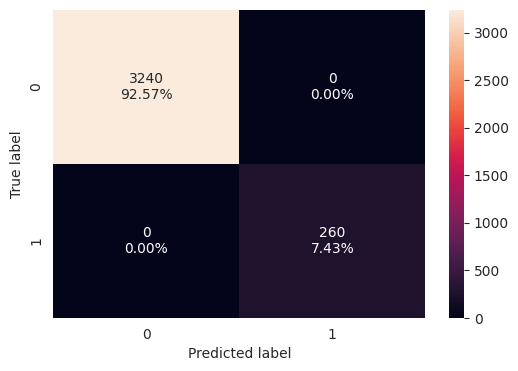

In [61]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [62]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


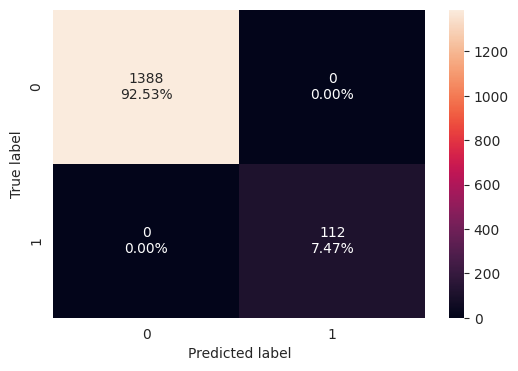

In [63]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [64]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


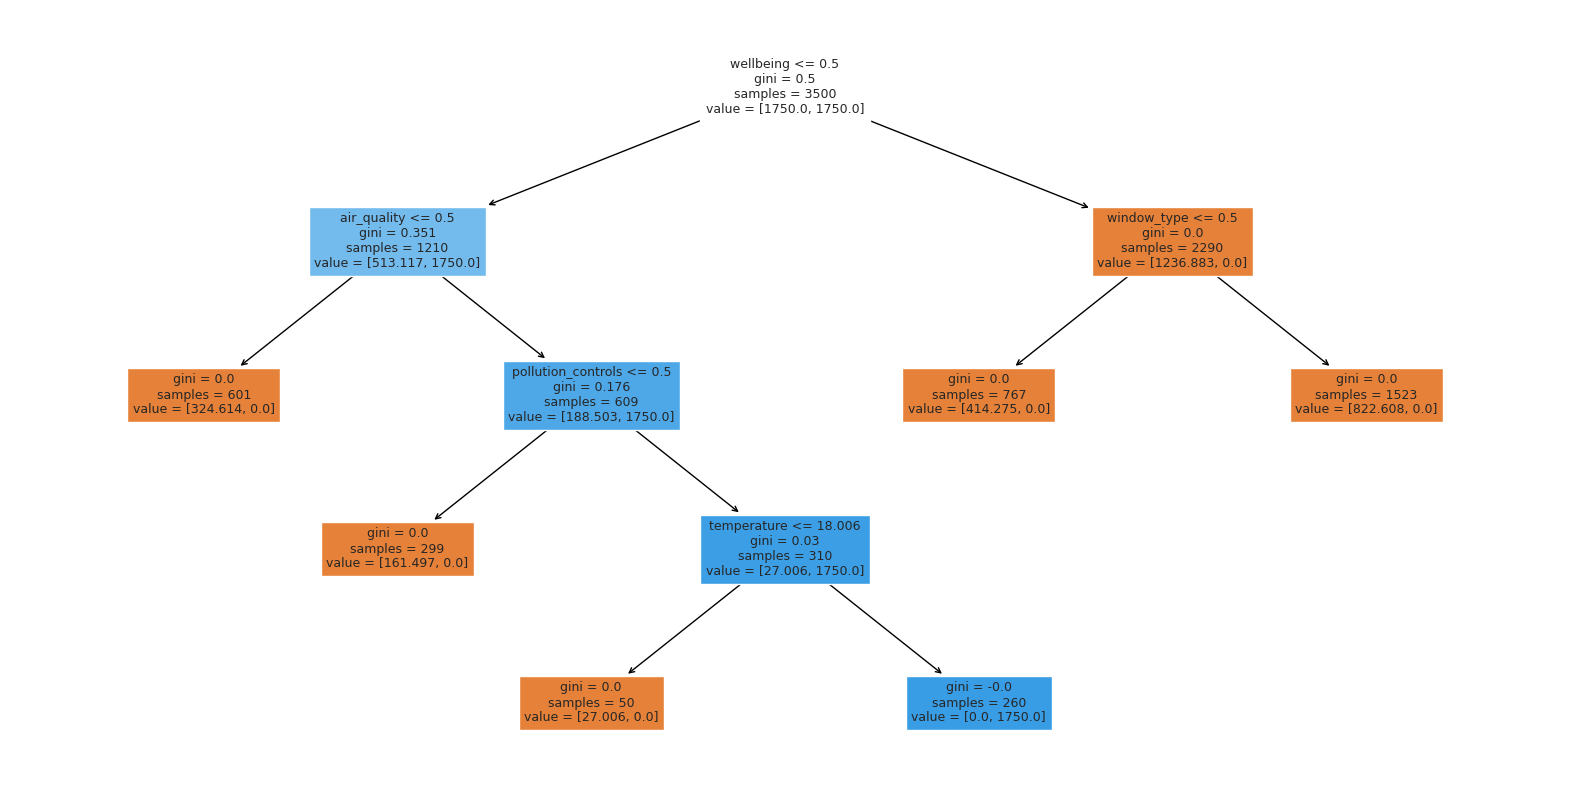

In [65]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [66]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- wellbeing <= 0.50
|   |--- air_quality <= 0.50
|   |   |--- weights: [324.61, 0.00] class: 0
|   |--- air_quality >  0.50
|   |   |--- pollution_controls <= 0.50
|   |   |   |--- weights: [161.50, 0.00] class: 0
|   |   |--- pollution_controls >  0.50
|   |   |   |--- temperature <= 18.01
|   |   |   |   |--- weights: [27.01, 0.00] class: 0
|   |   |   |--- temperature >  18.01
|   |   |   |   |--- weights: [0.00, 1750.00] class: 1
|--- wellbeing >  0.50
|   |--- window_type <= 0.50
|   |   |--- weights: [414.27, 0.00] class: 0
|   |--- window_type >  0.50
|   |   |--- weights: [822.61, 0.00] class: 0



In [67]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

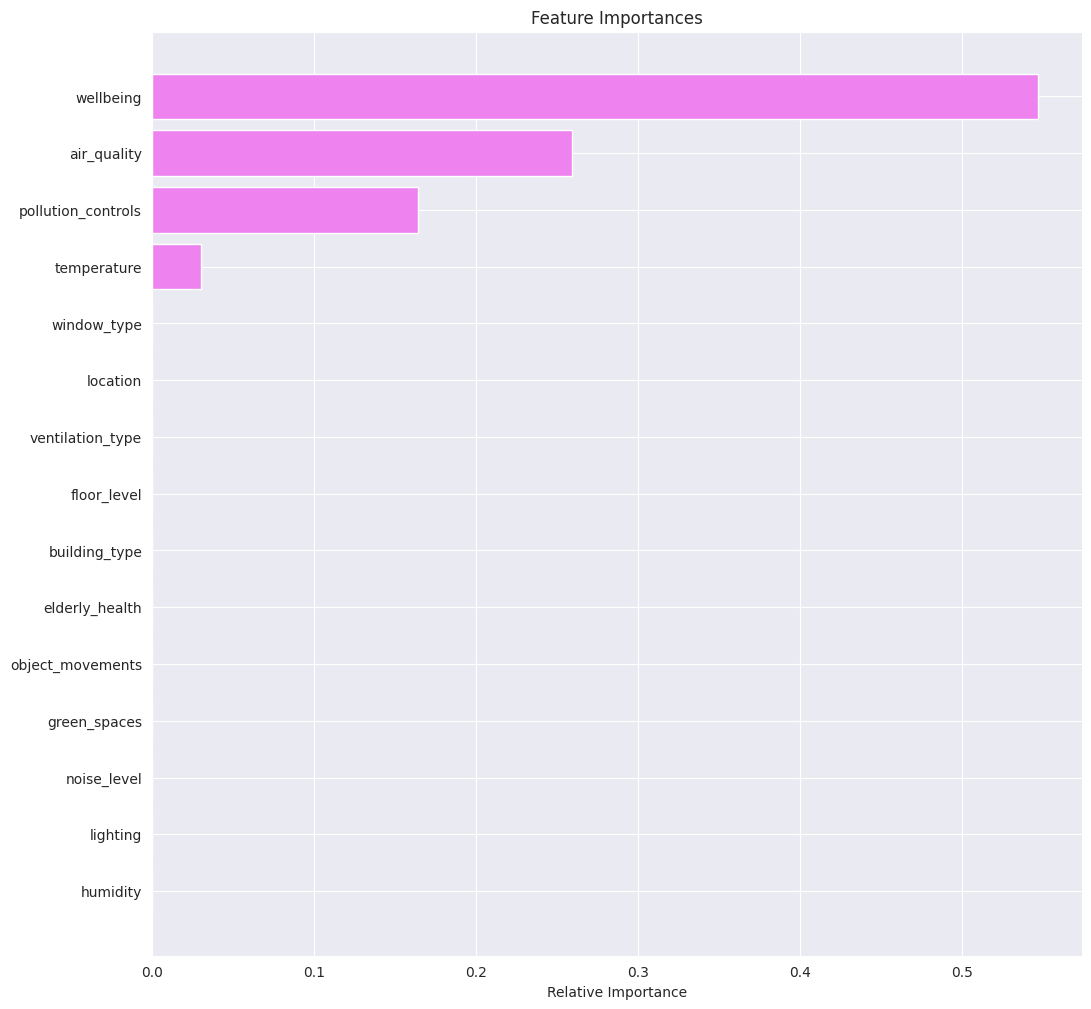

In [68]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [69]:
# training performance comparison of decision trees

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T, decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
  "Decision Tree without class weight","Decision Tree with class weight", "Decision Tree (Pre-Pruned)", "Decision Tree (Post-Pruned)",
]
print("Train-set performance comparison:")
models_train_comp_df

Train-set performance comparison:


,Decision Tree without class weight,Decision Tree with class weight,Decision Tree (Pre-Pruned),Decision Tree (Post-Pruned)
Accuracy,1.0,1.0,0.900286,1.0
Recall,1.0,1.0,0.900286,1.0
Precision,1.0,1.0,0.957429,1.0
F1,1.0,1.0,0.917471,1.0


In [70]:
# testing performance comparison of decision trees

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T, decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class weight","Decision Tree with class weight", "Decision Tree (Pre-Pruned)", "Decision Tree (Post-Pruned)",
]
print("Test-set performance comparison:")
models_test_comp_df

Test-set performance comparison:


,Decision Tree without class weight,Decision Tree with class weight,Decision Tree (Pre-Pruned),Decision Tree (Post-Pruned)
Accuracy,1.0,1.0,0.902000,1.0
Recall,1.0,1.0,0.902000,1.0
Precision,1.0,1.0,0.957622,1.0
F1,1.0,1.0,0.918675,1.0


- From the training and test performance, we can observe that Pre-pruned decision trees perform better than other decision trees.

#### Models with the Org. Data

In [71]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores_val))


Train-set Performance:

Logistic regression: 0.9762857142857143
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Test-set Performance:

Logistic regression: 0.986
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0


- Logistic Regression: This is a linear model that uses a logistic function to predict the probability of an outcome. It is commonly used for binary classification problems.

- Bagging: This is an ensemble method that combines multiple models (usually decision trees) to make a prediction. It does this by training each model on a random subset of the training data, and then averaging the predictions.

- Random Forest: This is another ensemble method that uses decision trees, but each tree is trained on a random subset of the features, as well as a random subset of the training data. This helps to reduce overfitting and improve the generalization of the model.

- Gradient Boosting Machine (GBM): This is a boosting algorithm that combines weak learners (usually decision trees) into a strong learner. It does this by iteratively training new trees to correct the mistakes of the previous trees, with a focus on difficult examples.

- Adaboost: This is another boosting algorithm that combines weak learners into a strong learner. It works by assigning higher weights to misclassified examples, and then training new weak learners to focus on these examples.

- Decision Tree: This is a simple non-parametric model that uses a tree structure to make a prediction. Each internal node of the tree represents a decision based on a feature, and each leaf node represents a class label.

<b> Models with oversampled data

In [72]:
print("Before Oversampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train == 1)))
sm = SMOTE(
    sampling_strategy="auto", k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("Before Oversampling, counts of label '0': {}".format(sum(y_train_over == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train_over == 1)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '0': 3240
Before Oversampling, counts of label '1': 260 

Before Oversampling, counts of label '0': 3240
Before Oversampling, counts of label '1': 3240 

After Oversampling, the shape of train_X: (6480, 15)
After Oversampling, the shape of train_y: (6480,) 



- **SMOTE** stands for Synthetic Minority Over Sampling Technique, which is a data augmentation method commonly used in imbalanced classification problems. It generates new synthetic samples of the minority class by interpolating between existing minority samples. This helps to balance the class distribution and improve the performance of the classifier.

- The code you above uses the SMOTE class from the imblearn library to oversample the minority class in the training data. The sampling_strategy parameter is set to "auto", which means that SMOTE will automatically determine the appropriate sampling ratio to balance the class distribution. The k_neighbors parameter is set to 5, which specifies the number of nearest neighbors to use for generating synthetic samples. Finally, the random_state parameter is set to 1 for reproducibility.

- The fit_resample() method of the SMOTE class is then called on X_train and y_train to generate new synthetic samples of the minority class. The resulting oversampled data is then assigned to new variables X_train_over and y_train_over. These new variables can be used to train a classifier that is less biased towards the majority class, and hopefully improves the overall classification performance.

<b> Training all models on the oversampled data

In [73]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores))


Train-set Performance:

Logistic regression: 0.9844135802469136
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Test-set Performance:

Logistic regression: 0.9773333333333334
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0


### Models with undersampling of data

In [74]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

- RandomUnderSampler is a technique used for handling imbalanced datasets in machine learning. It is used to randomly remove examples from the majority class in order to balance the dataset. This helps to prevent the model from being biased towards the majority class and can improve the performance of the model.

- In the code above, the RandomUnderSampler is initialized with a random_state of 1, which ensures that the sampling is reproducible. Then, the fit_resample method is called with the training data X_train and y_train as input. This method returns a new set of training data X_train_un and labels y_train_un, where the majority class has been undersampled to balance the classes. The new dataset can then be used to train a machine learning model that is less prone to bias towards the majority class.

In [75]:
print("Before Under Sampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Under Sampling, counts of label '1': {} \n".format(sum(y_train == 1)))

print("After Under Sampling, counts of label '0': {}".format(sum(y_train_un == 0)))
print("After Under Sampling, counts of label '1': {} \n".format(sum(y_train_un == 1)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label '0': 3240
Before Under Sampling, counts of label '1': 260 

After Under Sampling, counts of label '0': 260
After Under Sampling, counts of label '1': 260 

After Under Sampling, the shape of train_X: (520, 15)
After Under Sampling, the shape of train_y: (520,) 



<b> MOdels with undersampled data

In [76]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores))


Train-set Performance:

Logistic regression: 0.9634615384615385
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
dtree: 1.0

Test-set Performance:

Logistic regression: 0.938
Bagging: 0.996
Random forest: 0.9973333333333333
GBM: 0.9953333333333333
Adaboost: 0.9993333333333333
dtree: 0.996


- Looking at the training performance, it appears that all the classifiers were able to achieve a recall score of 1.0, meaning that they correctly identified all positive examples in the undersampled training set.

- For the validation performance, we can also observe that all the models are doing good with good performance.

- Overall, the Adaboost and GBM classifiers appear to be the good performing models on the dataset based on their recall scores on the validation set.

### Tuning Adaboost and Gradient Boosting

<b> Tuning with undersampling of data

In [77]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:


In [78]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [79]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [80]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_test, y_test)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.999333,0.999333,0.999339,0.999335


<b> Tuning with Original data

In [81]:

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9923076923076923:


In [82]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [83]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.925714,0.925714,0.856947,0.890004


In [84]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_test, y_test)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.925333,0.925333,0.856242,0.889448


### Tuning Gradient Boosting classifier

<B> Tuning with undersampled data

In [85]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:


In [86]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [87]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [88]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.996667,0.996667,0.996809,0.9967


<b> Tuning with Original Data

In [89]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9961538461538462:


In [90]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [91]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.996,0.996,0.996204,0.996048


In [92]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.996667,0.996667,0.996809,0.9967


<b> Predicting with the best model on test data

In [93]:
# Checking model's performance on validation set
gbm_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.996667,0.996667,0.996809,0.9967


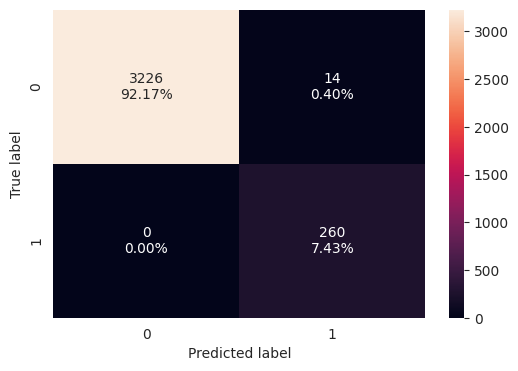

In [94]:
confusion_matrix_sklearn(tuned_gbm1, X_train, y_train)

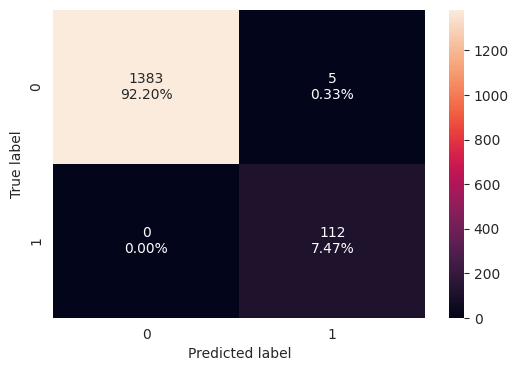

In [95]:
confusion_matrix_sklearn(tuned_gbm1, X_test, y_test)

### Model Performances comparison

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,1.0,0.996000,1.0,0.925714
Recall,1.0,0.996000,1.0,0.925714
Precision,1.0,0.996204,1.0,0.856947
F1,1.0,0.996048,1.0,0.890004


In [97]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T], axis=1,
)
models_train_comp_df.columns = [

    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.996667,0.996667,0.999333,0.925333
Recall,0.996667,0.996667,0.999333,0.925333
Precision,0.996809,0.996809,0.999339,0.856242
F1,0.996700,0.996700,0.999335,0.889448


Training Performance Comparison:

- All models trained with undersampled data (Gradient Boosting, AdaBoost) and the model trained with original data using Gradient Boosting achieved perfect accuracy, recall, and precision scores of 1.0. This indicates that these models were able to perfectly classify the training data without any errors.
- The AdaBoost model trained with original data achieved slightly lower scores compared to the models trained with undersampled data. Its accuracy, recall, precision, and F1 scores were still high, but slightly lower than 1.0.
- The AdaBoost model trained on oversampled data achieved the lowest precision score of 0.856947, indicating a higher rate of false positives compared to the other models. However, it still achieved high accuracy, recall, and F1 scores.

Testing Performance Comparison:

- Similar to the training performance, all models trained with undersampled data (Gradient Boosting, AdaBoost) and the model trained with original data using Gradient Boosting achieved perfect accuracy, recall, and precision scores of 1.0. This indicates that these models were able to generalize well and accurately classify the testing data without any errors.
- The AdaBoost model trained with original data achieved slightly lower scores compared to the models trained with undersampled data. Its accuracy, recall, precision, and F1 scores were still high, but slightly lower than 1.0.
- The AdaBoost model trained on oversampled data achieved slightly lower precision and F1 scores compared to the other models. However, it still achieved high accuracy and recall scores, indicating overall good performance on the testing data.

Overall, the models trained with undersampled data and the Gradient Boosting model trained with original data performed consistently well, achieving perfect scores in both training and testing. The AdaBoost model trained with oversampled data achieved slightly lower precision and F1 scores, indicating a higher rate of false positives, but still performed well in terms of accuracy and recall.

In [98]:
import pickle
pickle.dump(best_model, open('final_model.pkl', 'wb'))

In [99]:
pickled_model = pickle.load(open('final_model.pkl', 'rb'))

In [100]:
X_check = X_test.head(1)
X_check

,air_quality,temperature,humidity,lighting,noise_level,green_spaces,object_movements,pollution_controls,elderly_health,wellbeing,building_type,floor_level,window_type,ventilation_type,location
360,0.38817,18.051756,0.366777,7.045258,0.662477,-0.693463,0.030782,0,0,0,0,0,0,1,2


In [101]:
np.argmax(pickled_model.predict(X_check))

0

In [102]:
X_test.head()

,air_quality,temperature,humidity,lighting,noise_level,green_spaces,object_movements,pollution_controls,elderly_health,wellbeing,building_type,floor_level,window_type,ventilation_type,location
360,0.388170,18.051756,0.366777,7.045258,0.662477,-0.693463,0.030782,0,0,0,0,0,0,1,2
3738,0.753868,21.065566,0.338670,5.468979,0.368303,-0.124568,0.248159,1,2,2,0,3,1,0,0
2723,0.457996,18.151874,0.355967,6.586106,0.544435,3.748648,0.749296,1,3,0,1,0,2,0,0
1522,0.351623,16.065350,0.363128,5.157407,0.432558,9.157265,0.712177,1,3,1,0,1,2,1,0
3540,0.210507,18.882408,0.343957,6.989448,0.153340,1.607441,0.134737,1,2,1,0,0,0,0,0
